# Main Focus of the Notebook: Plotting the filtered Tracks with different Lifetime Cohorts and Cummulative Plots

In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from skimage import io
import numpy as np 

plt.rcParams["font.family"] = ""

In [2]:
track_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_updated.pkl')
filtered_tracks = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/filtered_tracks.pkl')

In [3]:
#divide into lifetime cohorts
#lifetimeCohorts = [[5,15],[16,25],[26,35],[36,45],[46,60]]
#drop all tracks below 5 frames (keep ones with 5 frames)
##from pylattice most tracks between 34-68seconds 
##second most tracks 0-34seconds
##third most 68-100seconds 
##few tracks above 100seconds 
##few tracks above this 

In [4]:
filtered_tracks.head()

,track_id,c2_peak,c3_peak,track_length,start_frame,end_frame,peak_frame_c2,peak_start_c2,peak_frame_c3,peak_start_c3
5,36,202.0,299.000000,34,0,33,17,17,25,25
17,73,224.0,345.835302,8,0,7,6,6,6,6
25,91,326.0,300.333333,21,0,20,19,19,17,17
49,145,181.0,258.333333,20,0,19,14,14,10,10
58,155,231.0,335.000000,12,0,11,4,4,7,7


Keeping only tracks with length greater than 4 for plotting purposes

In [5]:
filtered_tracks = filtered_tracks[filtered_tracks['track_length'] > 4]

Finding the upper limit of track length for plotting purposes.

In [6]:
#Get the max length
filtered_tracks['track_length'].max()

60

### The following function takes in our dataframe and returns track id arrays for the defined length ranges. The length ranges are defined within the function 

In [7]:
def filter_track_ids_by_length_ranges(df):
    length_ranges = [[5, 10], [11,15], [16, 25], [26, 35], [36, 45], [46, 60]]
    
    # Create an empty dictionary to store track IDs for each length range
    track_ids_dict = {f'Length_{low}_{high}': [] for low, high in length_ranges}
    
    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        track_id = row['track_id']
        track_length = row['track_length']
        
        # Check if track_length falls within any of the specified ranges
        for i, (low, high) in enumerate(length_ranges):
            if low <= track_length <= high:
                key = f'Length_{low}_{high}'
                track_ids_dict[key].append(track_id)
    
    # Convert the dictionary values to arrays
    track_id_arrays = [track_ids_dict[key] for key in track_ids_dict]
    
    return track_id_arrays

In [8]:
track_id_arrays = filter_track_ids_by_length_ranges(filtered_tracks)

In [9]:
print(f'number of tracks between [5,10] inclusive are {len(track_id_arrays[0])}')
print(f'number of tracks between [11,15] inclusive are {len(track_id_arrays[1])}')
print(f'number of tracks between [16,25] inclusive are {len(track_id_arrays[2])}')
print(f'number of tracks between [26,35] inclusive are {len(track_id_arrays[3])}')
print(f'number of tracks between [36,45] inclusive are {len(track_id_arrays[4])}')
print(f'number of tracks between [46,60] inclusive are {len(track_id_arrays[5])}')

number of tracks between [5,10] inclusive are 78
number of tracks between [11,15] inclusive are 106
number of tracks between [16,25] inclusive are 101
number of tracks between [26,35] inclusive are 25
number of tracks between [36,45] inclusive are 15
number of tracks between [46,60] inclusive are 6


### The following function selects random track ids of a desired length 

In [10]:
def random_track_ids(df, desired_length, num_to_select=16):
    """
    Randomly selects track_ids of a desired length from a DataFrame.

    Parameters:
    - df: DataFrame with 'track_id' and 'length' columns.
    - desired_length: The desired length of tracks to select.
    - num_to_select: The number of track_ids to randomly select (default is 16).

    Returns:
    - List of randomly selected track_ids.
    """
    # Filter the DataFrame for tracks with the desired length
    tracks_of_desired_length = df[(df['track_length'] >= desired_length[0]) & 
                                  (df['track_length'] <= desired_length[1]) ]

    # Determine the number of tracks available for the desired length
    num_tracks_available = len(tracks_of_desired_length)

    # Determine the number of tracks to randomly select (minimum of num_to_select or available tracks)
    num_tracks_to_select = min(num_to_select, num_tracks_available)

    if num_tracks_to_select > 0:
        # Randomly select track_ids
        selected_track_ids = np.random.choice(tracks_of_desired_length['track_id'], num_tracks_to_select, replace=False)
        return selected_track_ids
    else:
        print(f"No tracks of length {desired_length} available.")
        return []

# Plotting 64 tracks of length between 5 and 10 inclusive 

### The amplitude used for plotting is mean amplitude from both channels. Peaks or Voxel sum can be used for plotting by slightly tweaking the code

In [11]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [5,10], num_to_select=64)

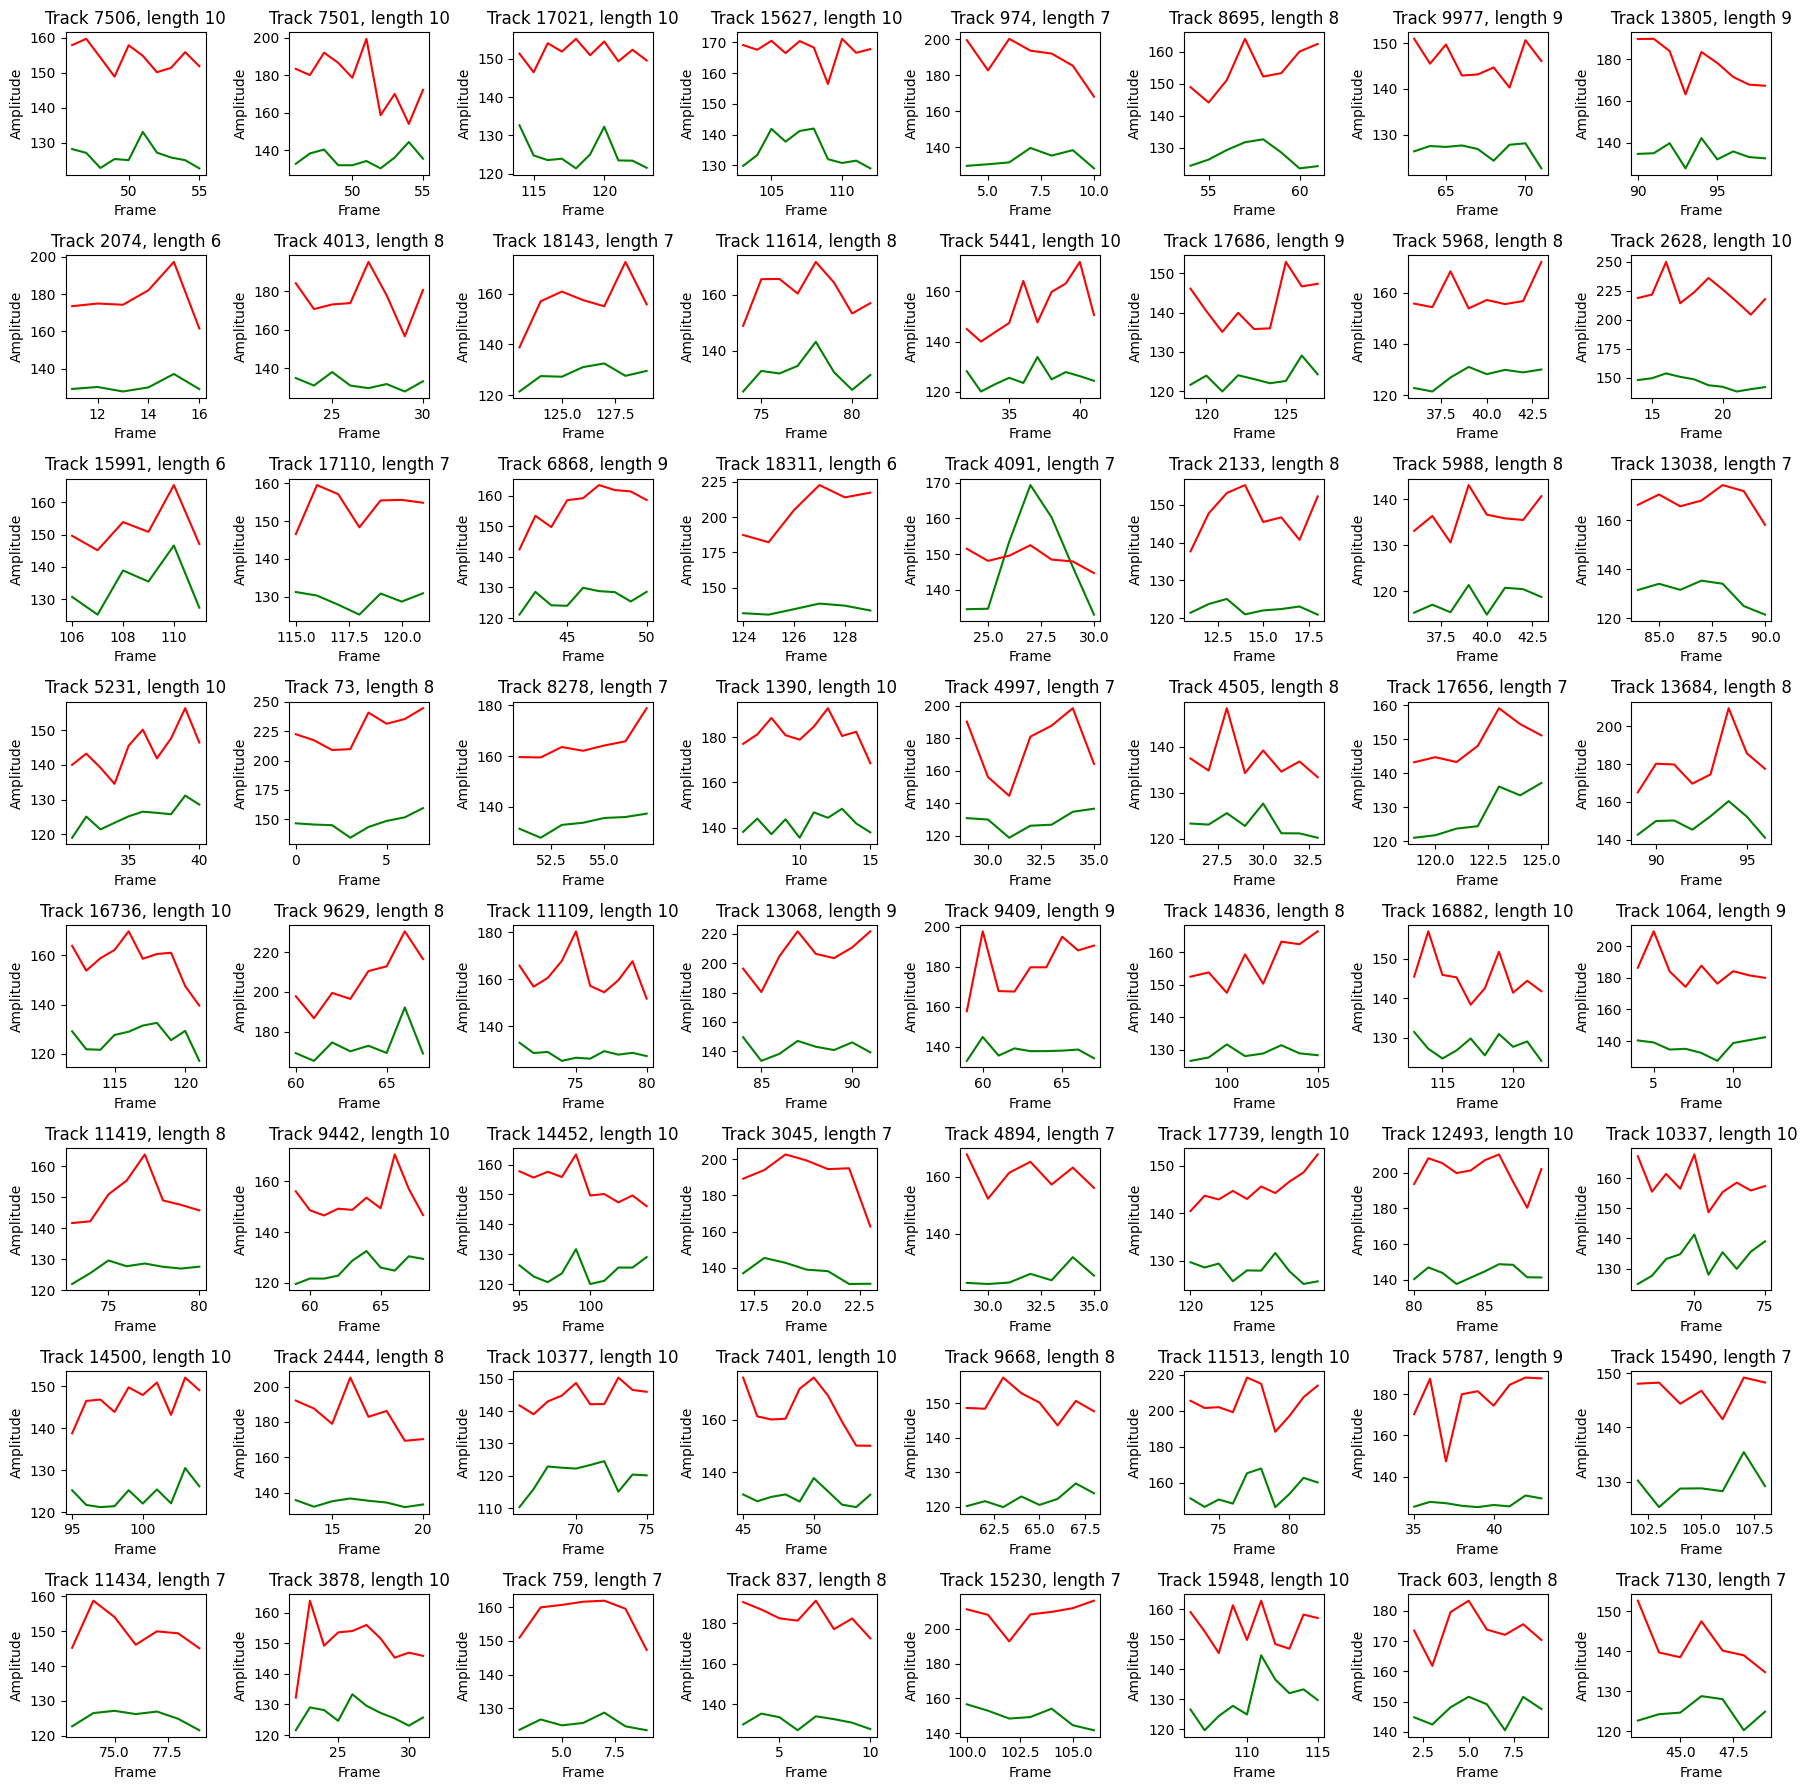

In [12]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 8 by 8 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Plotting 64 tracks between length 11 and 15 inclusive 

In [13]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [11,15], num_to_select=64)

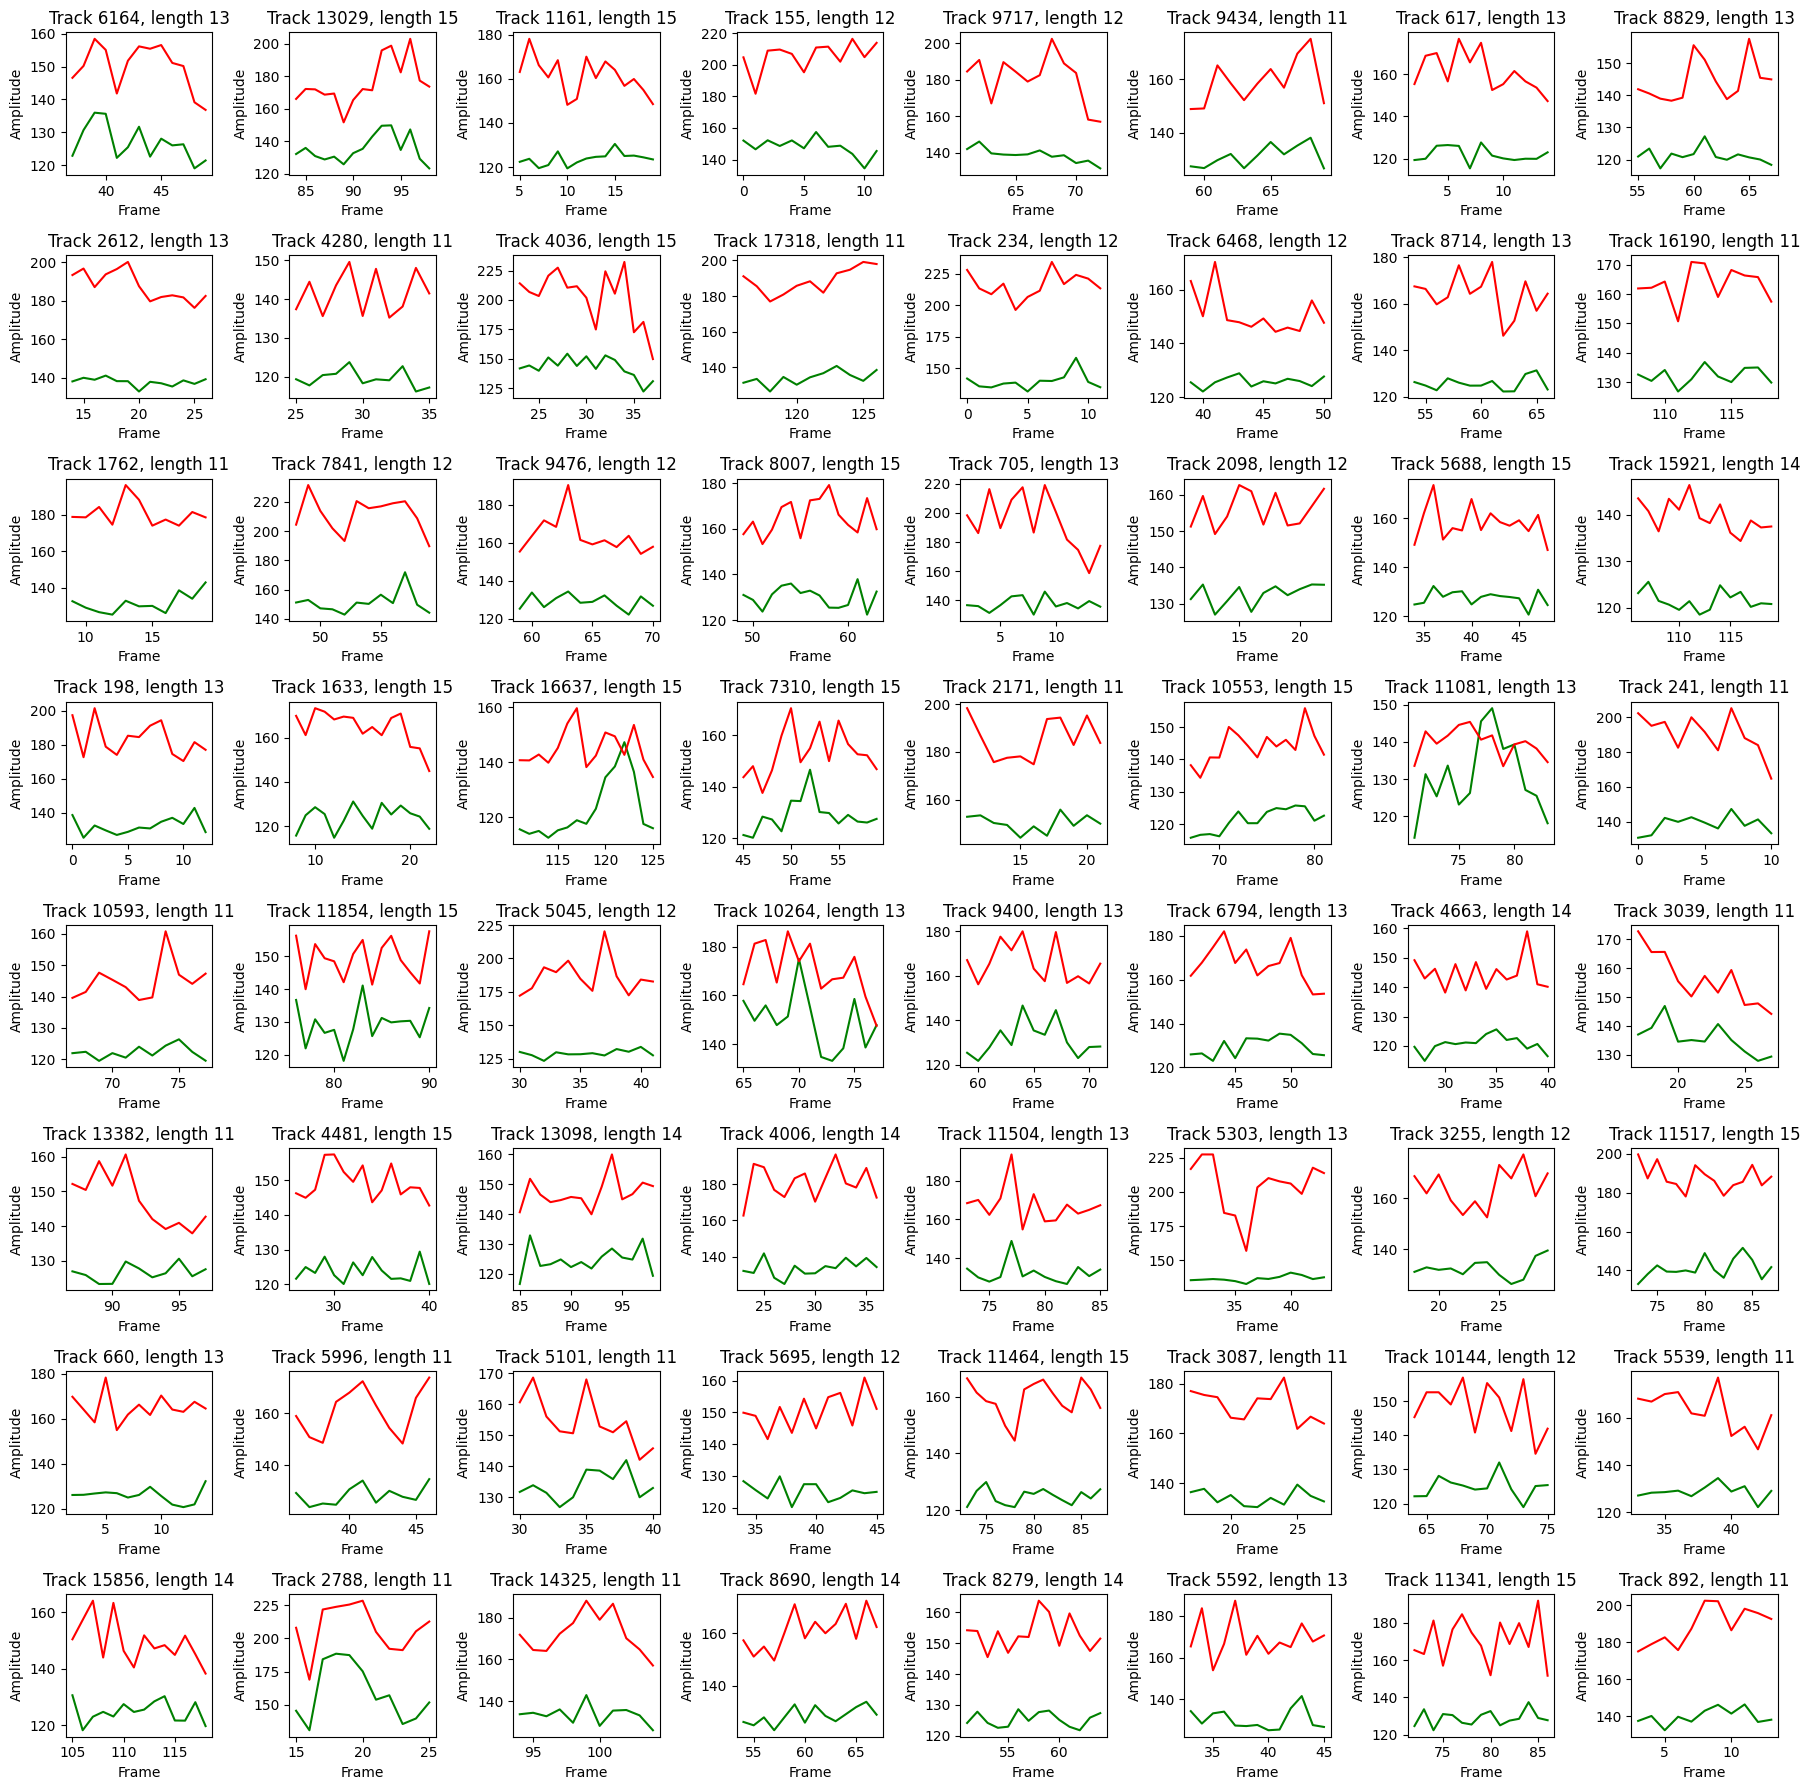

In [14]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 8 by 8 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Plotting 64 tracks between length 16 and 25 inclusive

In [15]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [16,25], num_to_select=64)

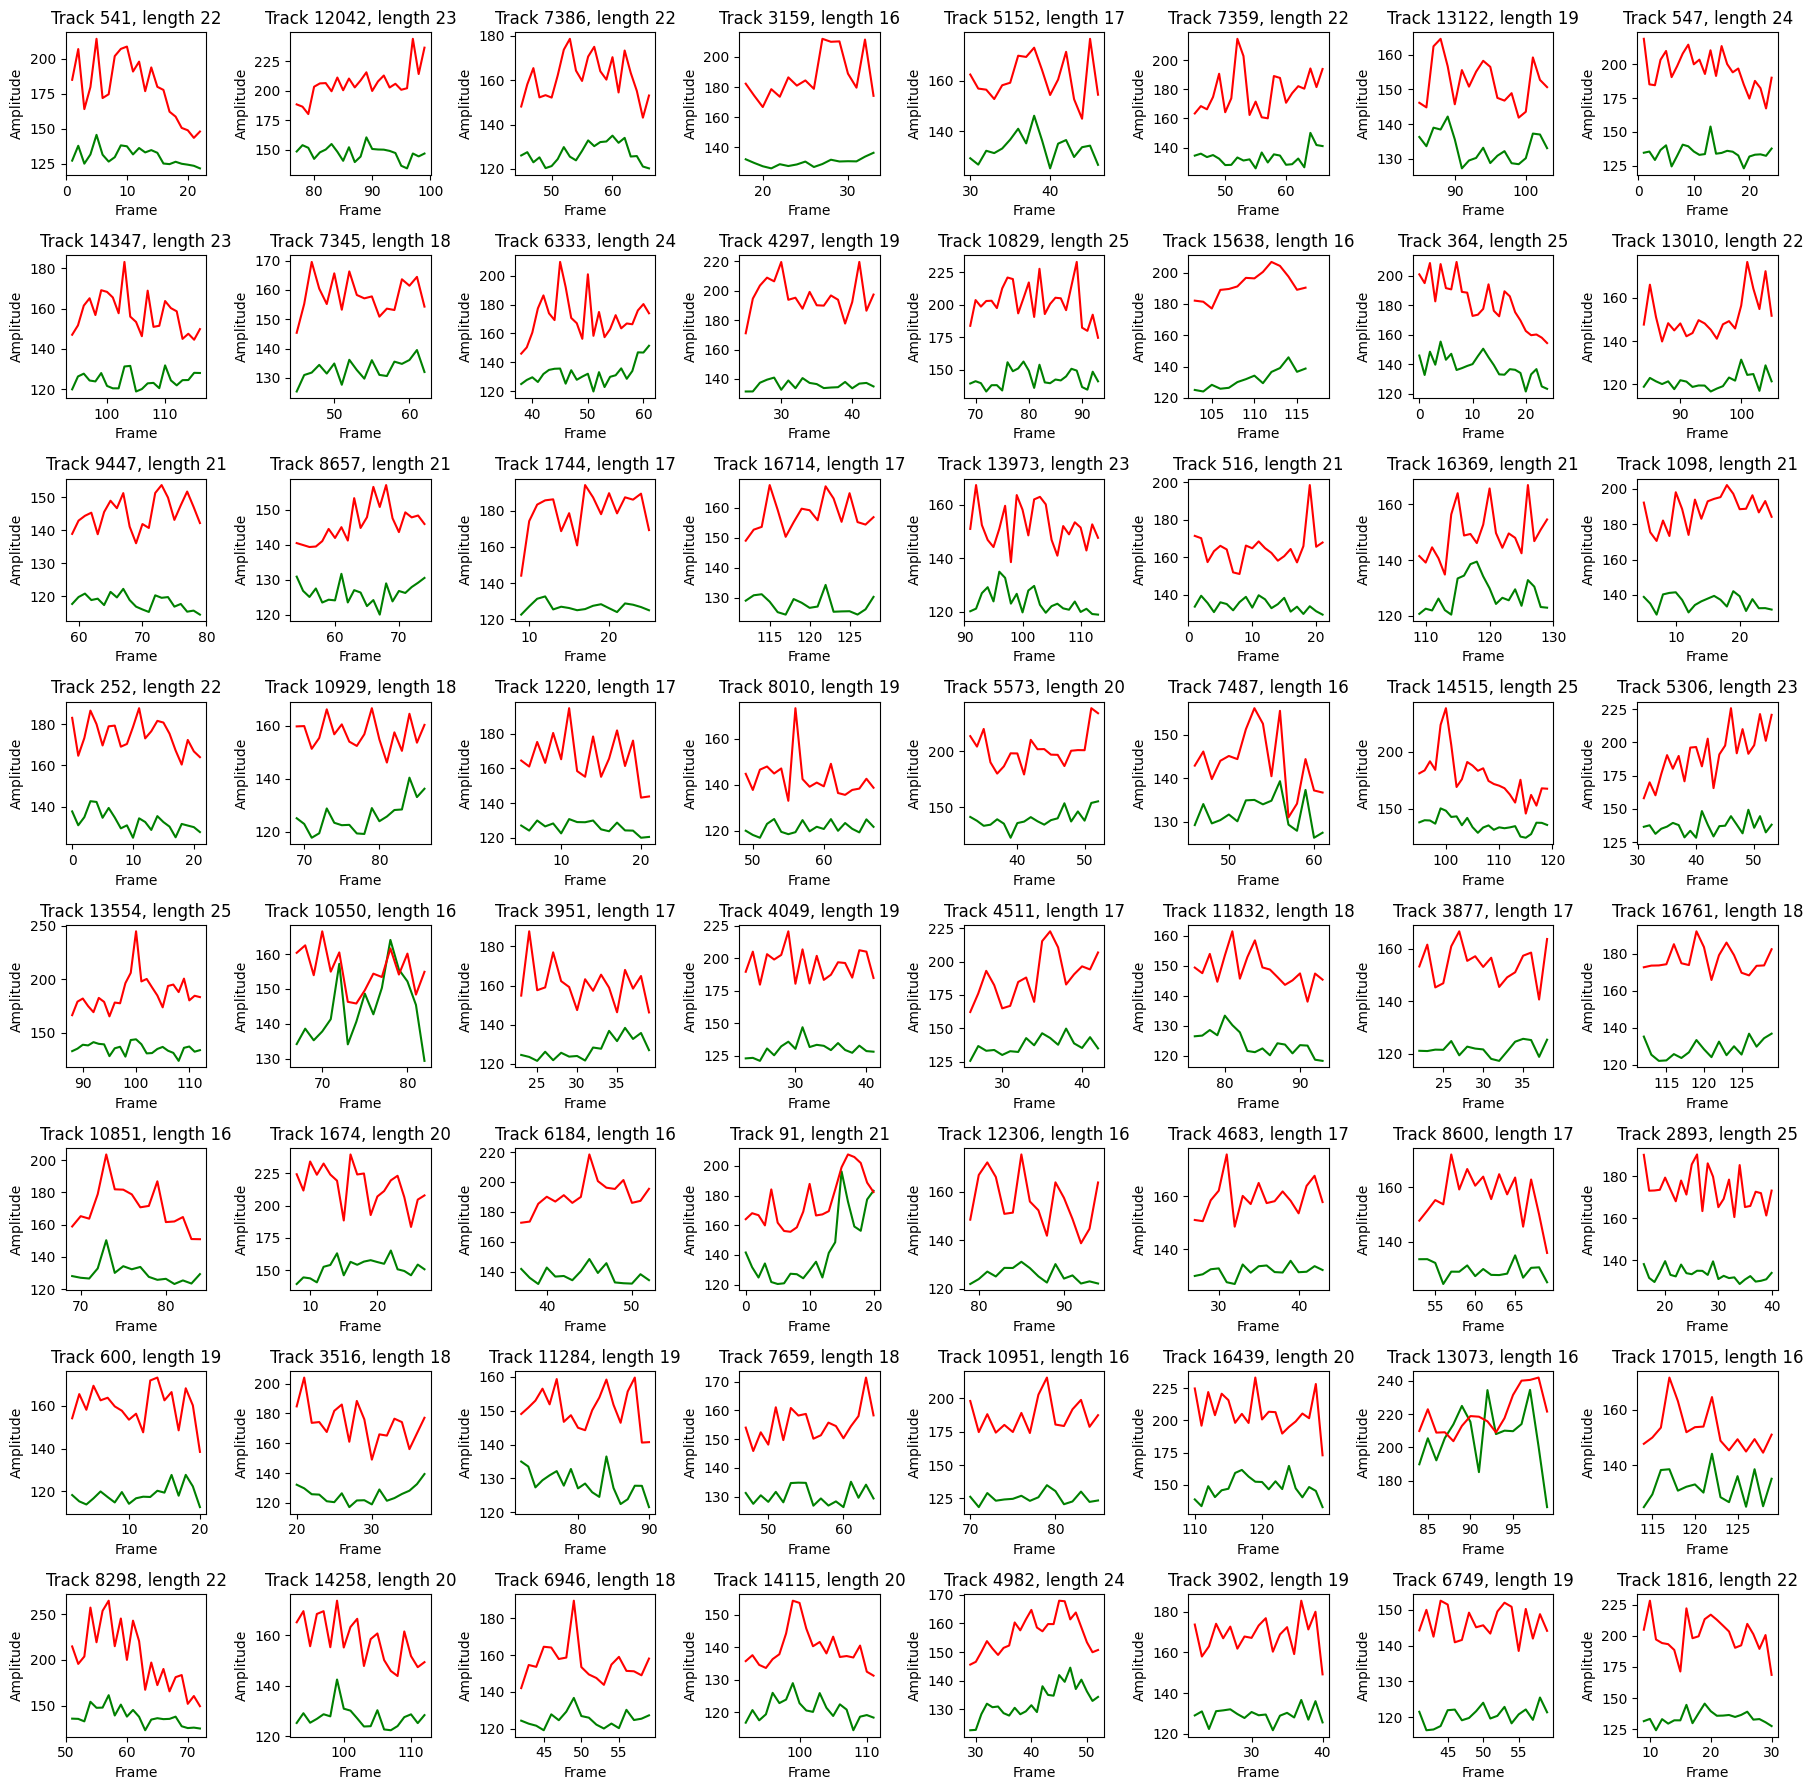

In [16]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 8 by 8 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# The following function creates a buffer to align tracks by their peak value 

In [17]:
def createBufferForLifetimeCohort(listOfTrackIdsAssignedToCohort, backgroundIntensity):
    
    '''
    
    The function takes in the list of track ids assigned to a cohort and aligns them with respect to their 
    peak values to a specific index. The index depends on bufferZero. Whatever the value of bufferZero is the
    peaks will be aligned with that value. 
    
    Parameters:
    1. listOfTrackIdsAssignedToCohort -> supposed to be a list of track ids 
    2. backgroundIntensity -> the background intensity of the movie 
    
    Output: 
    1. Returns the array of primary channel tracks aligned with respect to secondary channel peaks
    2. Returns the array of secondary channel tracks where tracks are aligned with all peaks of tracks being on 
    the same index. (the index is determined by bufferZero)
    
    '''


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    p_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100

    
    p_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
     
    counter = 0
    
    for trackId in trackIdArray:
        track = track_df[track_df['track_id'] == trackId]
        tracklength = filtered_tracks[filtered_tracks['track_id']==trackId]['track_length'].values[0]
        p_intensity = track['amplitude'].values.astype(float) #primary (channel 3 in our case)
        s_intensity = track['c2_peak'].values.astype(float) #secondary  (channel 2 in our case)
        maxIdx = np.argmax(s_intensity)
        
    
        for i in range(0,len(track)):
            if(not np.isnan(p_intensity[i])):
                p_buffer[counter][bufferZero-maxIdx+i]=(p_intensity[i])
            if(not np.isnan(s_intensity[i])):
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])
           
                
        counter = counter+1;
    
    
    return (p_buffer,s_buffer)

# The following function aligns tracks by their peak values and normalizes all the values 

In [18]:
def createBufferForLifetimeCohort_normalized(listOfTrackIdsAssignedToCohort, backgroundIntensity):
    
    '''
    This is a variant of the above function which normalizes the intensity values. 
    
    '''


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200 #default 200
    bufferZero = 100 #default 100

    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = track_df[track_df['track_id'] == trackId]
        tracklength = filtered_tracks['track_length'].values[0]
        m_intensity = track['amplitude'].values.astype(float)
        s_intensity = track['c2_peak'].values.astype(float)
        maxIdx = np.argmax(s_intensity)
        m_maxIntensity = np.nanmax(m_intensity)
        s_maxIntensity = np.nanmax(s_intensity)
        
    
        for i in range(0,len(track)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_intensity[i])/m_maxIntensity
            if(not np.isnan(s_intensity[i])):
                valueToPut = (s_intensity[i])/s_maxIntensity
                #print(valueToPut)
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])/s_maxIntensity
                #print(s_buffer[counter])
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)


In [19]:
primary,secondary = createBufferForLifetimeCohort(track_id_arrays[0],150)

In [20]:

#A short code to run to see that actually all the tracks are aligned by 
max_value = 0
max_index = 0
j = 15
for i in range(len(secondary[j])):
    if (secondary[j][i] > max_value):
        max_value = secondary[j][i]
        max_index = i


print(max_index)


100


In [21]:
primary.shape

(78, 200)

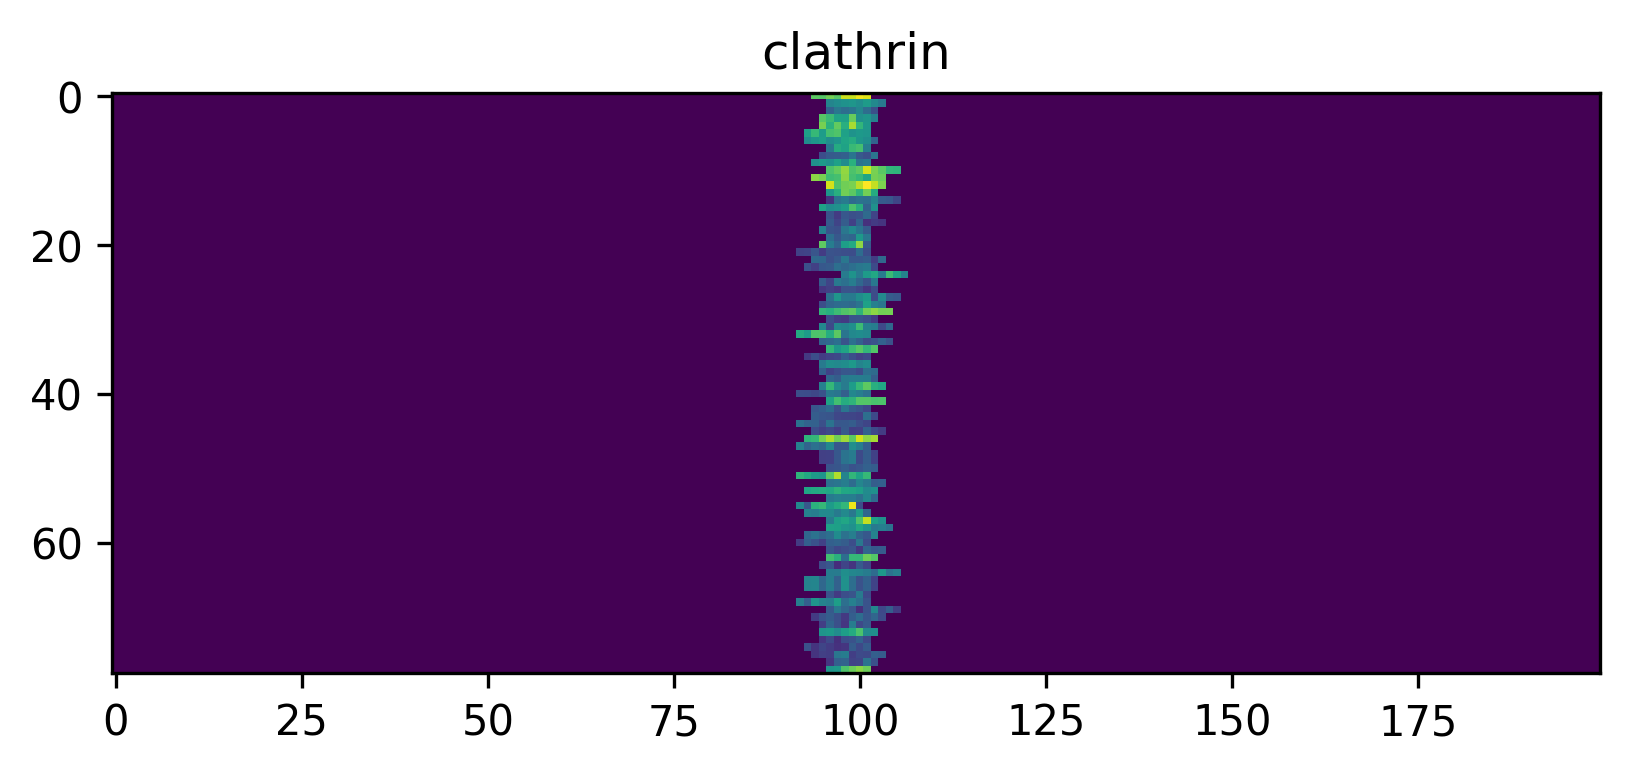

In [22]:
plt.figure(dpi=300)
plt.title('clathrin')
plt.imshow(primary)

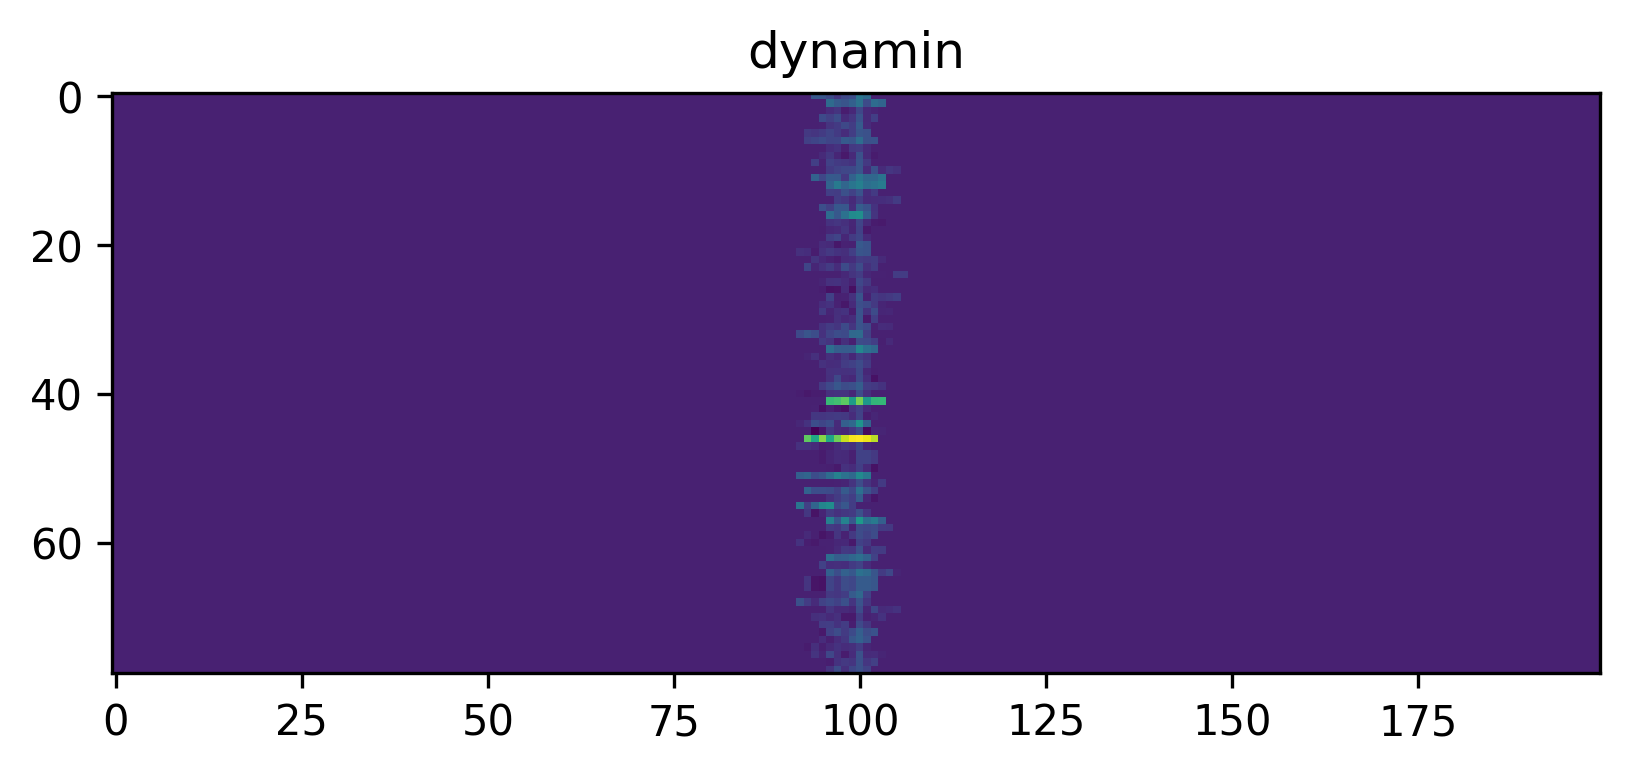

In [23]:
plt.figure(dpi=300)
plt.title('dynamin')
plt.imshow(secondary)

## Initial Cohort Plots without Normalization 

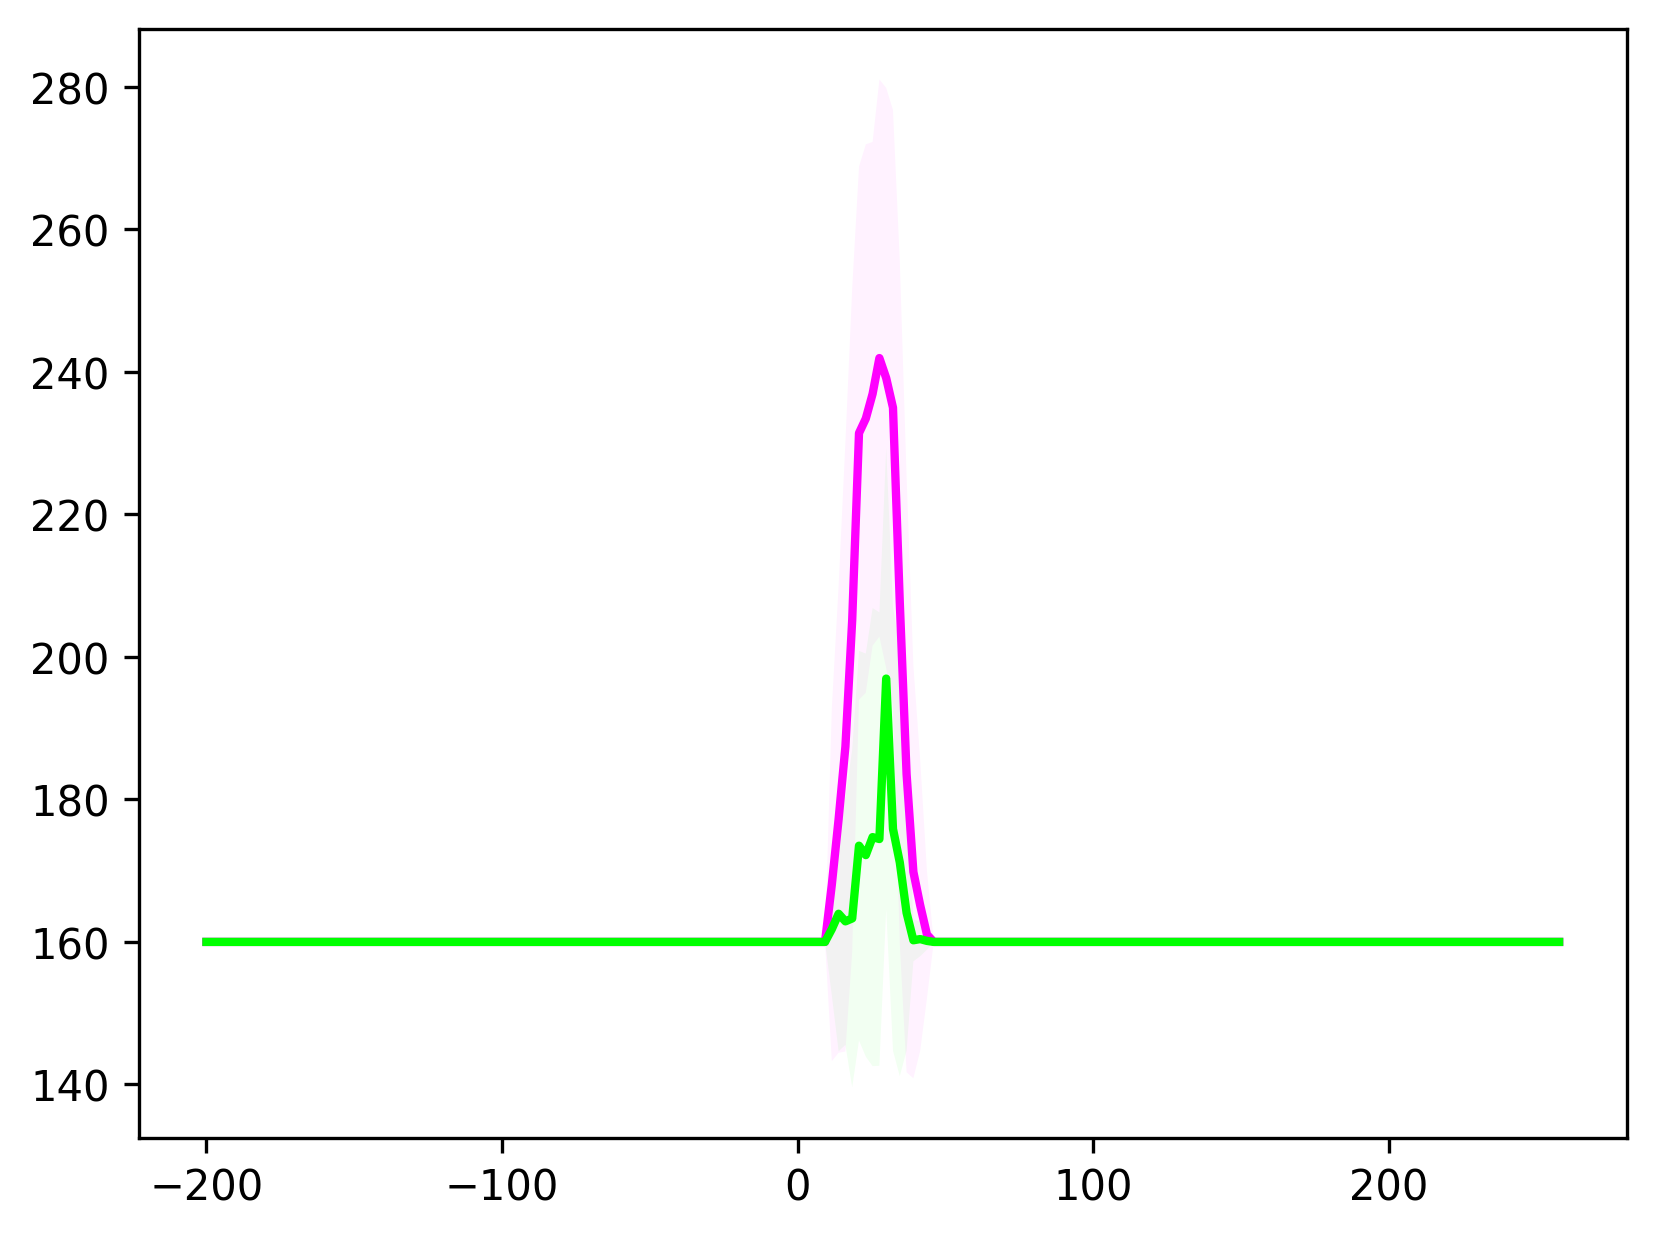

In [36]:
primary, secondary = createBufferForLifetimeCohort(track_id_arrays[0],160)
##Between 5 to 10 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

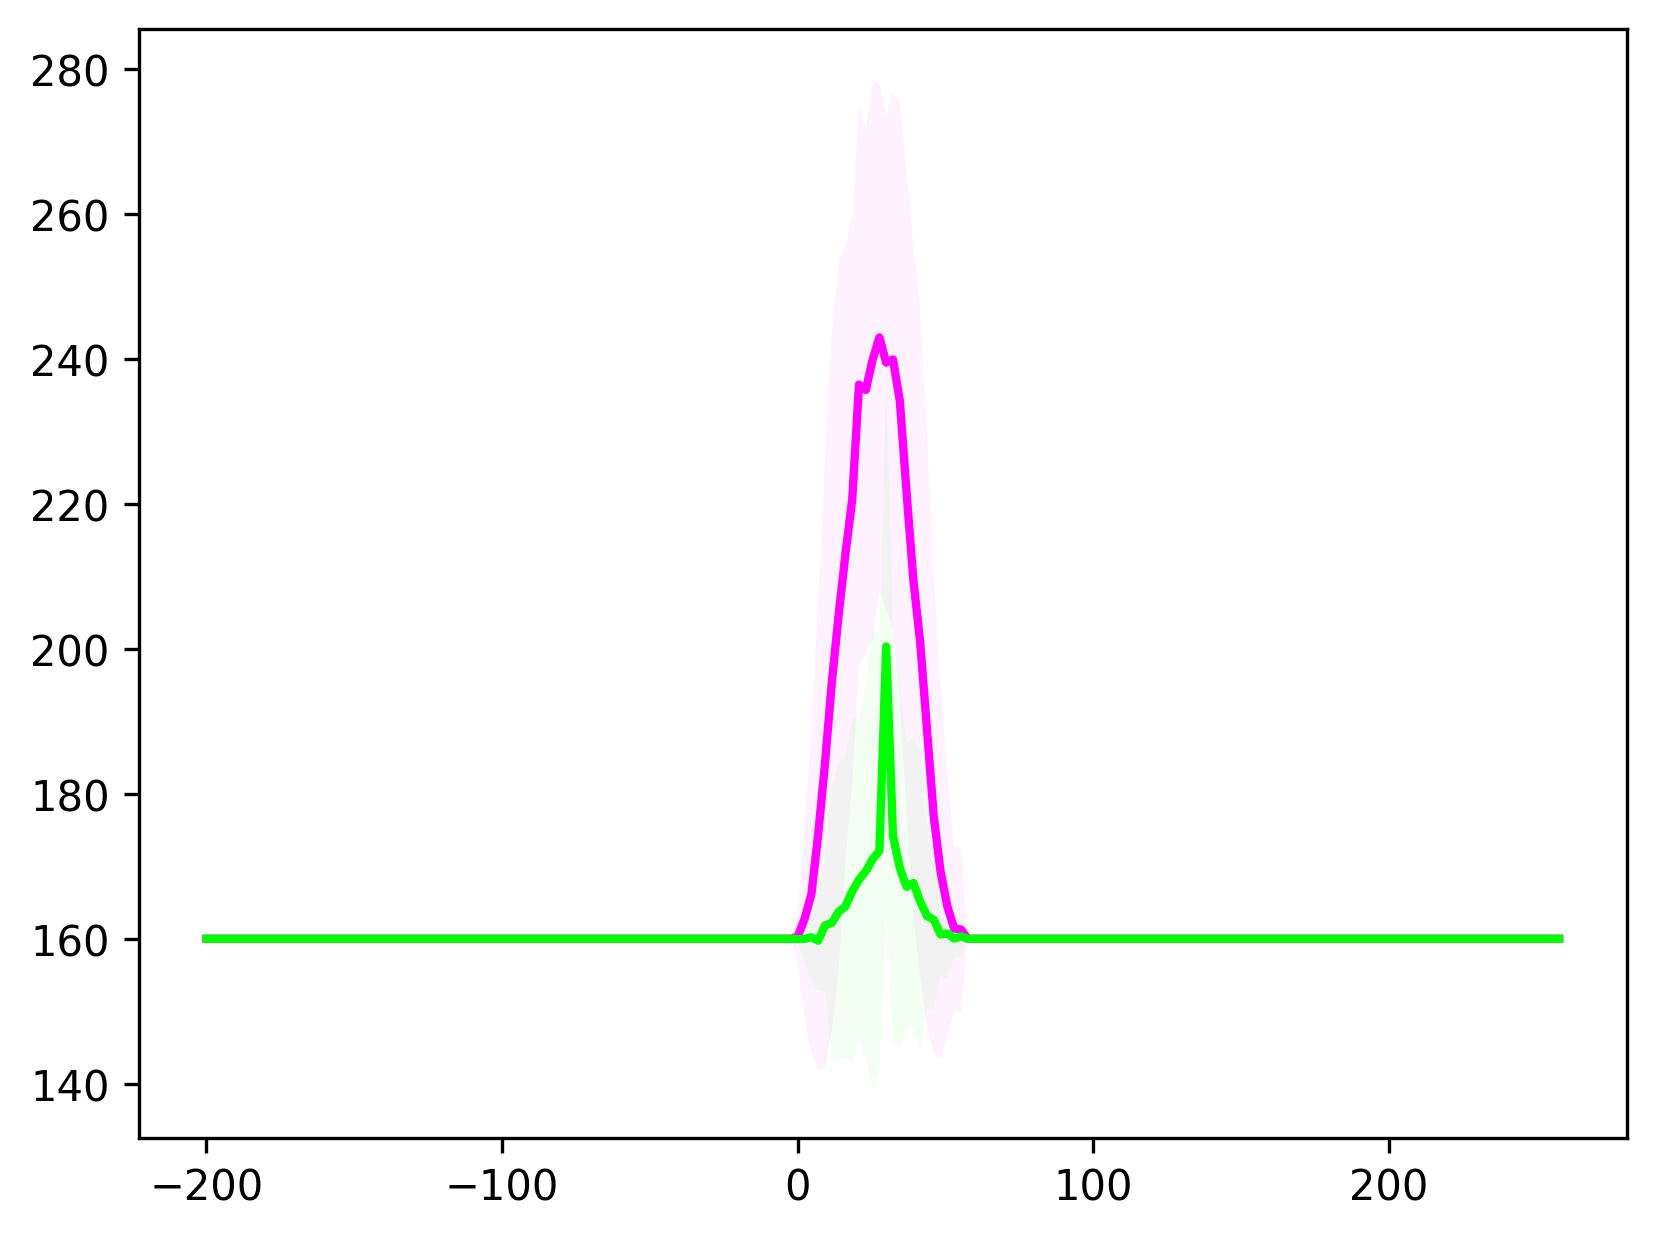

In [37]:
primary, secondary = createBufferForLifetimeCohort(track_id_arrays[1],160)
##Between 11 to 15 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

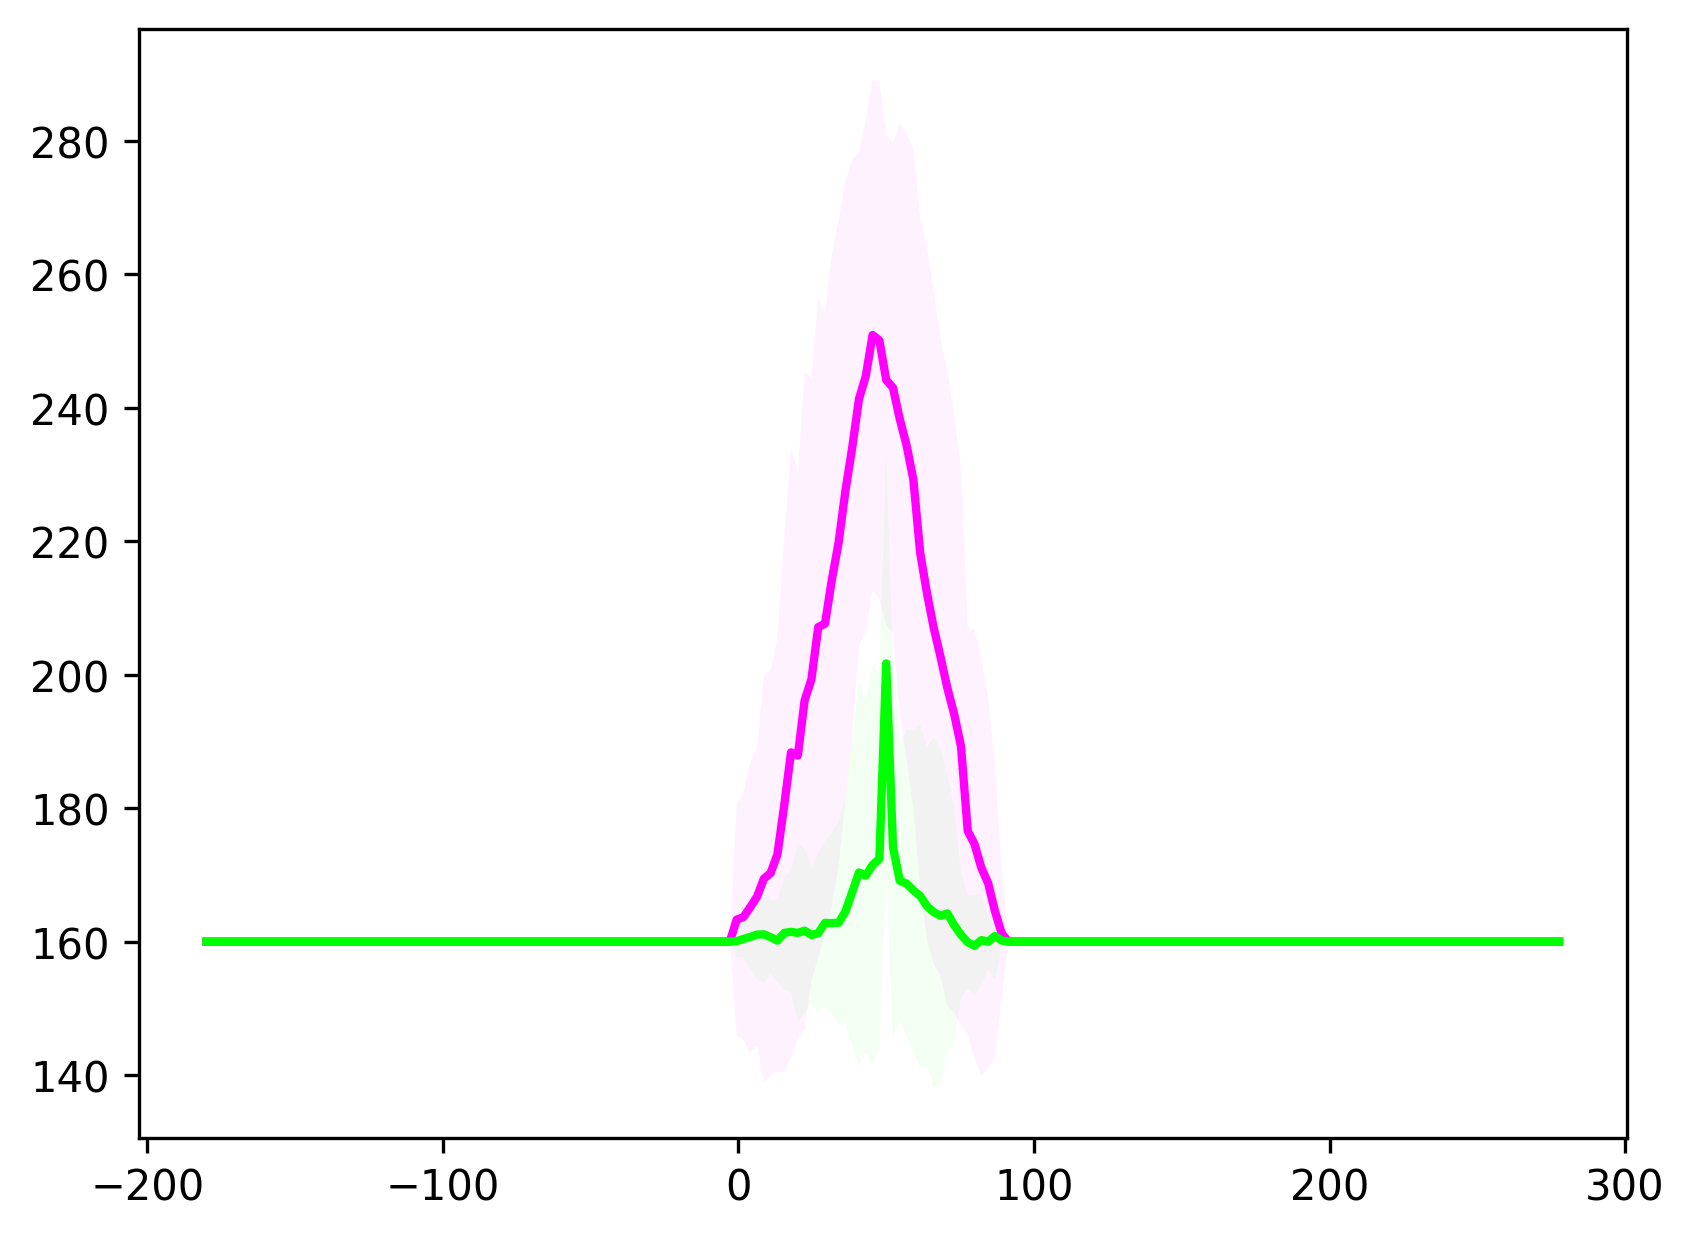

In [38]:
primary, secondary = createBufferForLifetimeCohort(track_id_arrays[2],160)
##Between 16 to 25 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) + 50
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

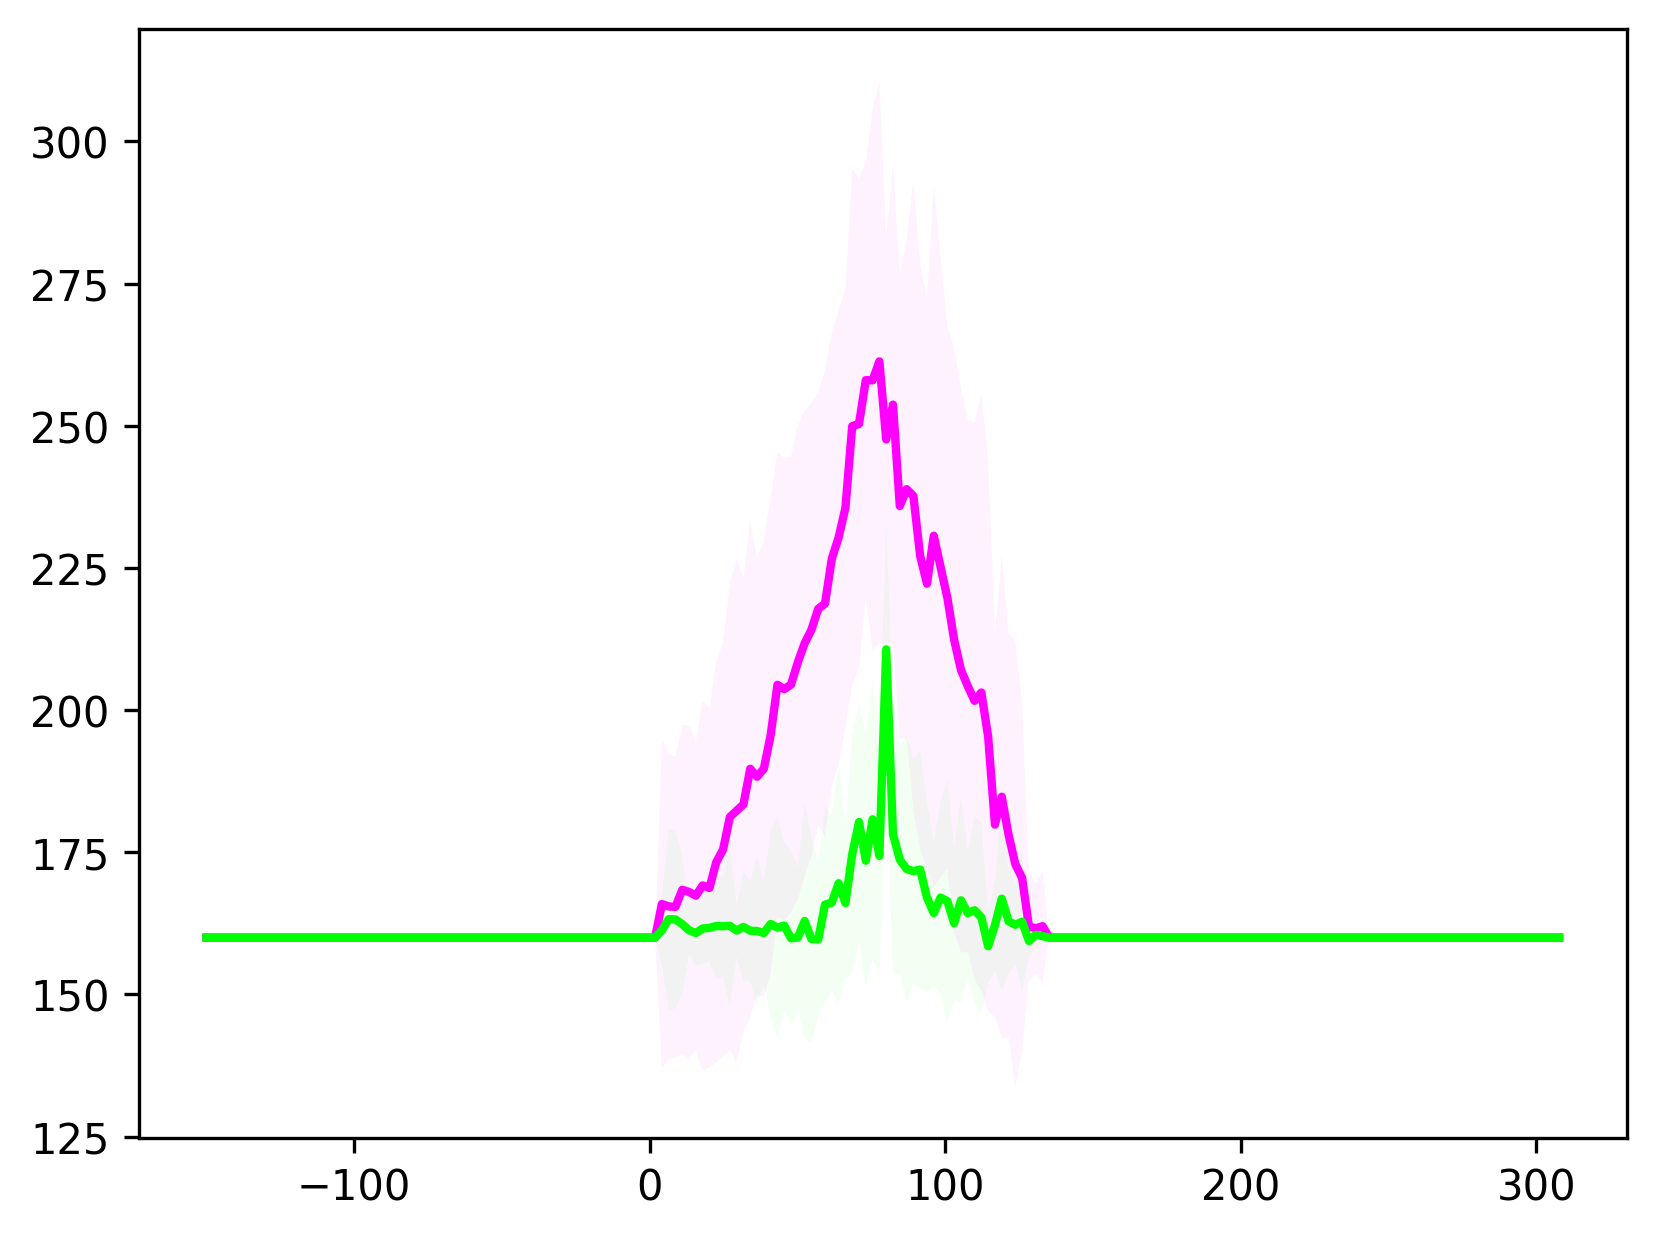

In [39]:
primary, secondary = createBufferForLifetimeCohort(track_id_arrays[3],160)
##Between 26 to 35 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +80
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

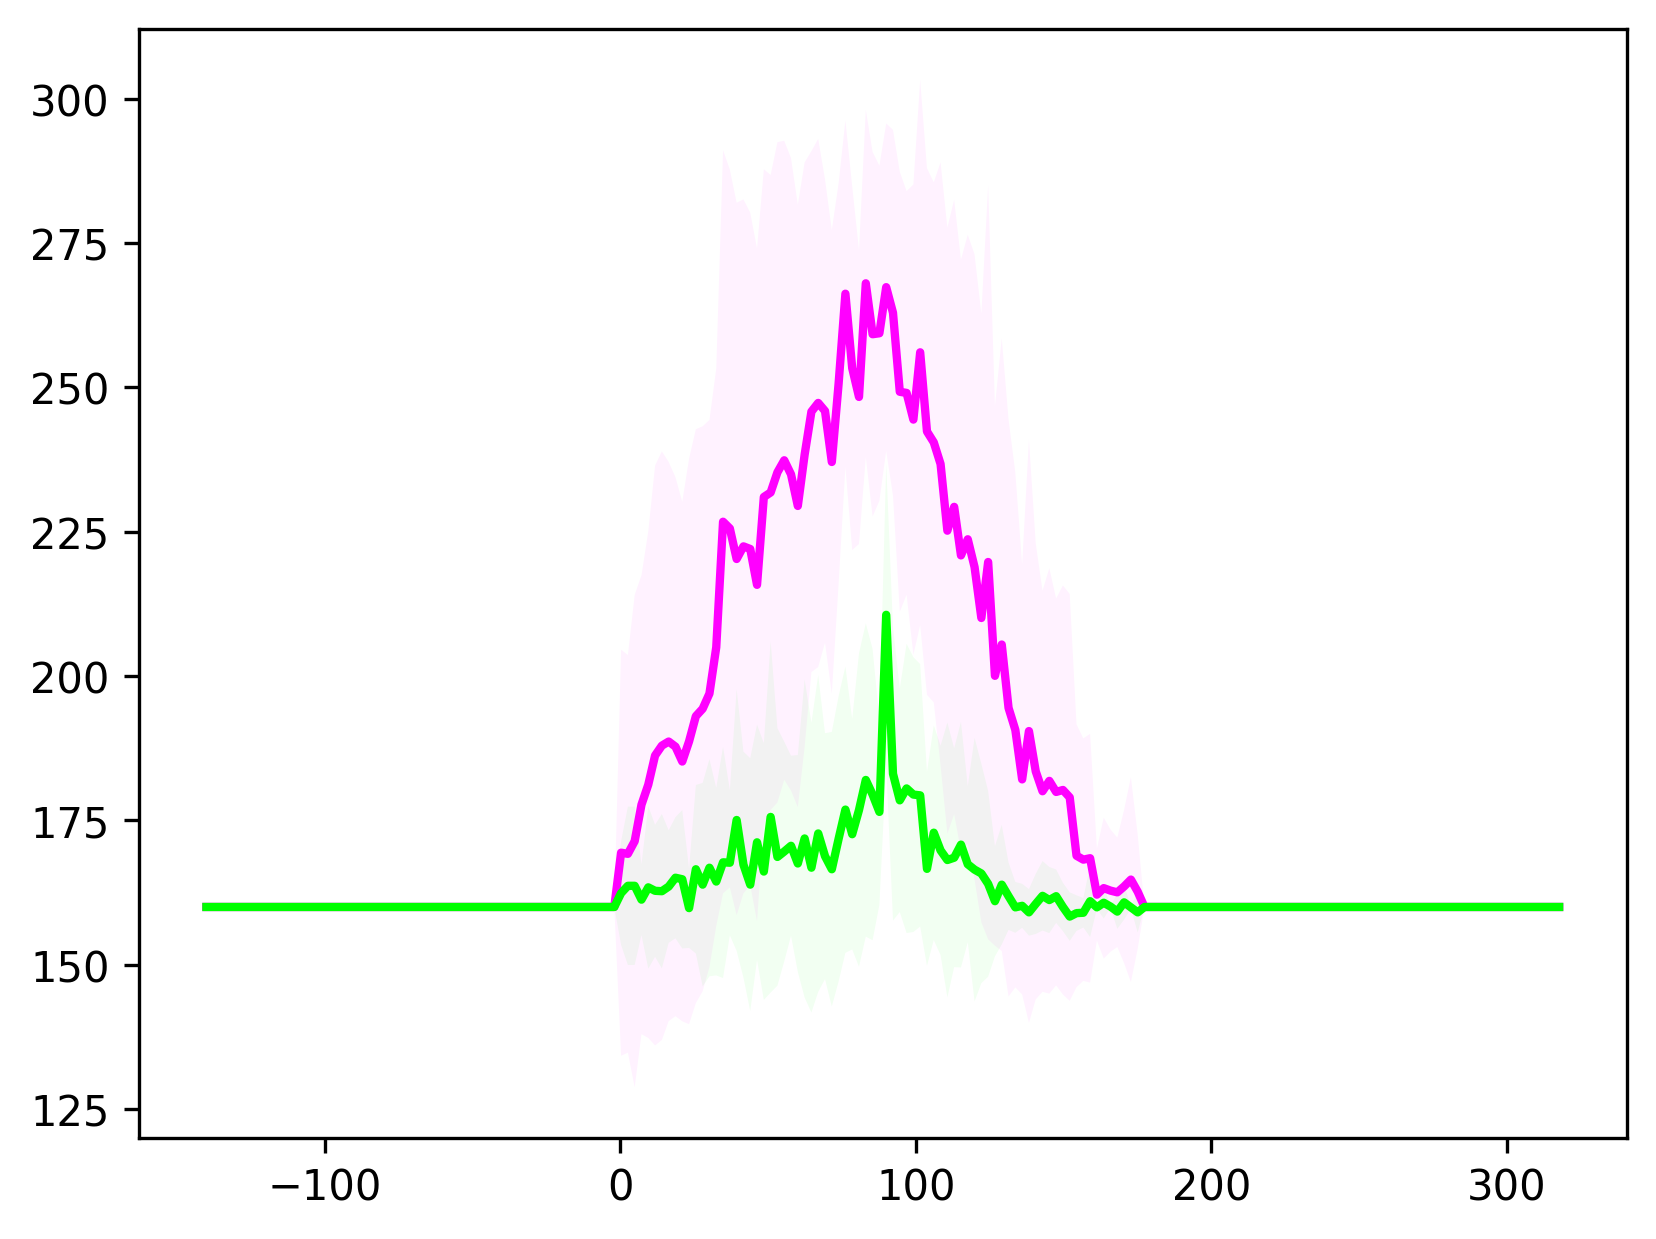

In [40]:
primary, secondary = createBufferForLifetimeCohort(track_id_arrays[4],160)
##Between 36 to 45 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) + 90
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

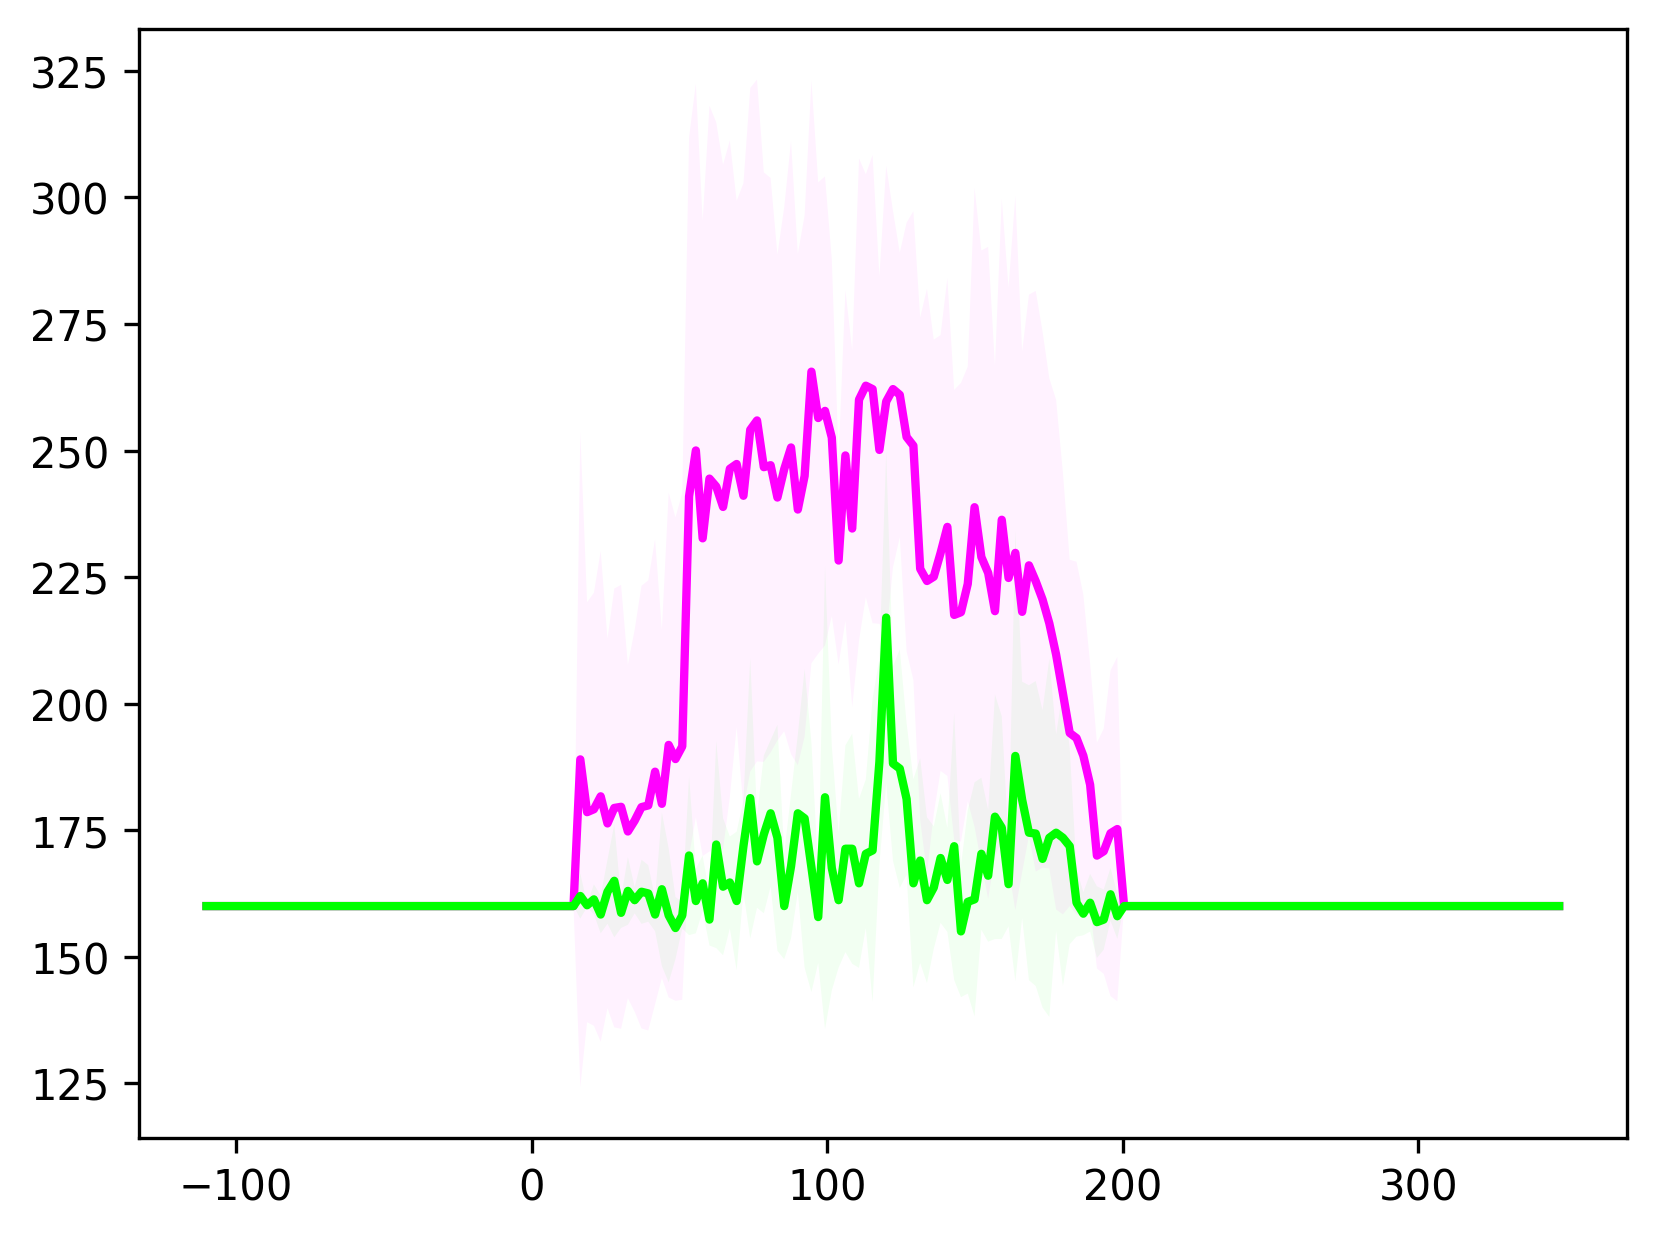

In [41]:
primary, secondary = createBufferForLifetimeCohort(track_id_arrays[5],160)
##Between 46 to 60 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +120
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

## Normalized Cohort Plots

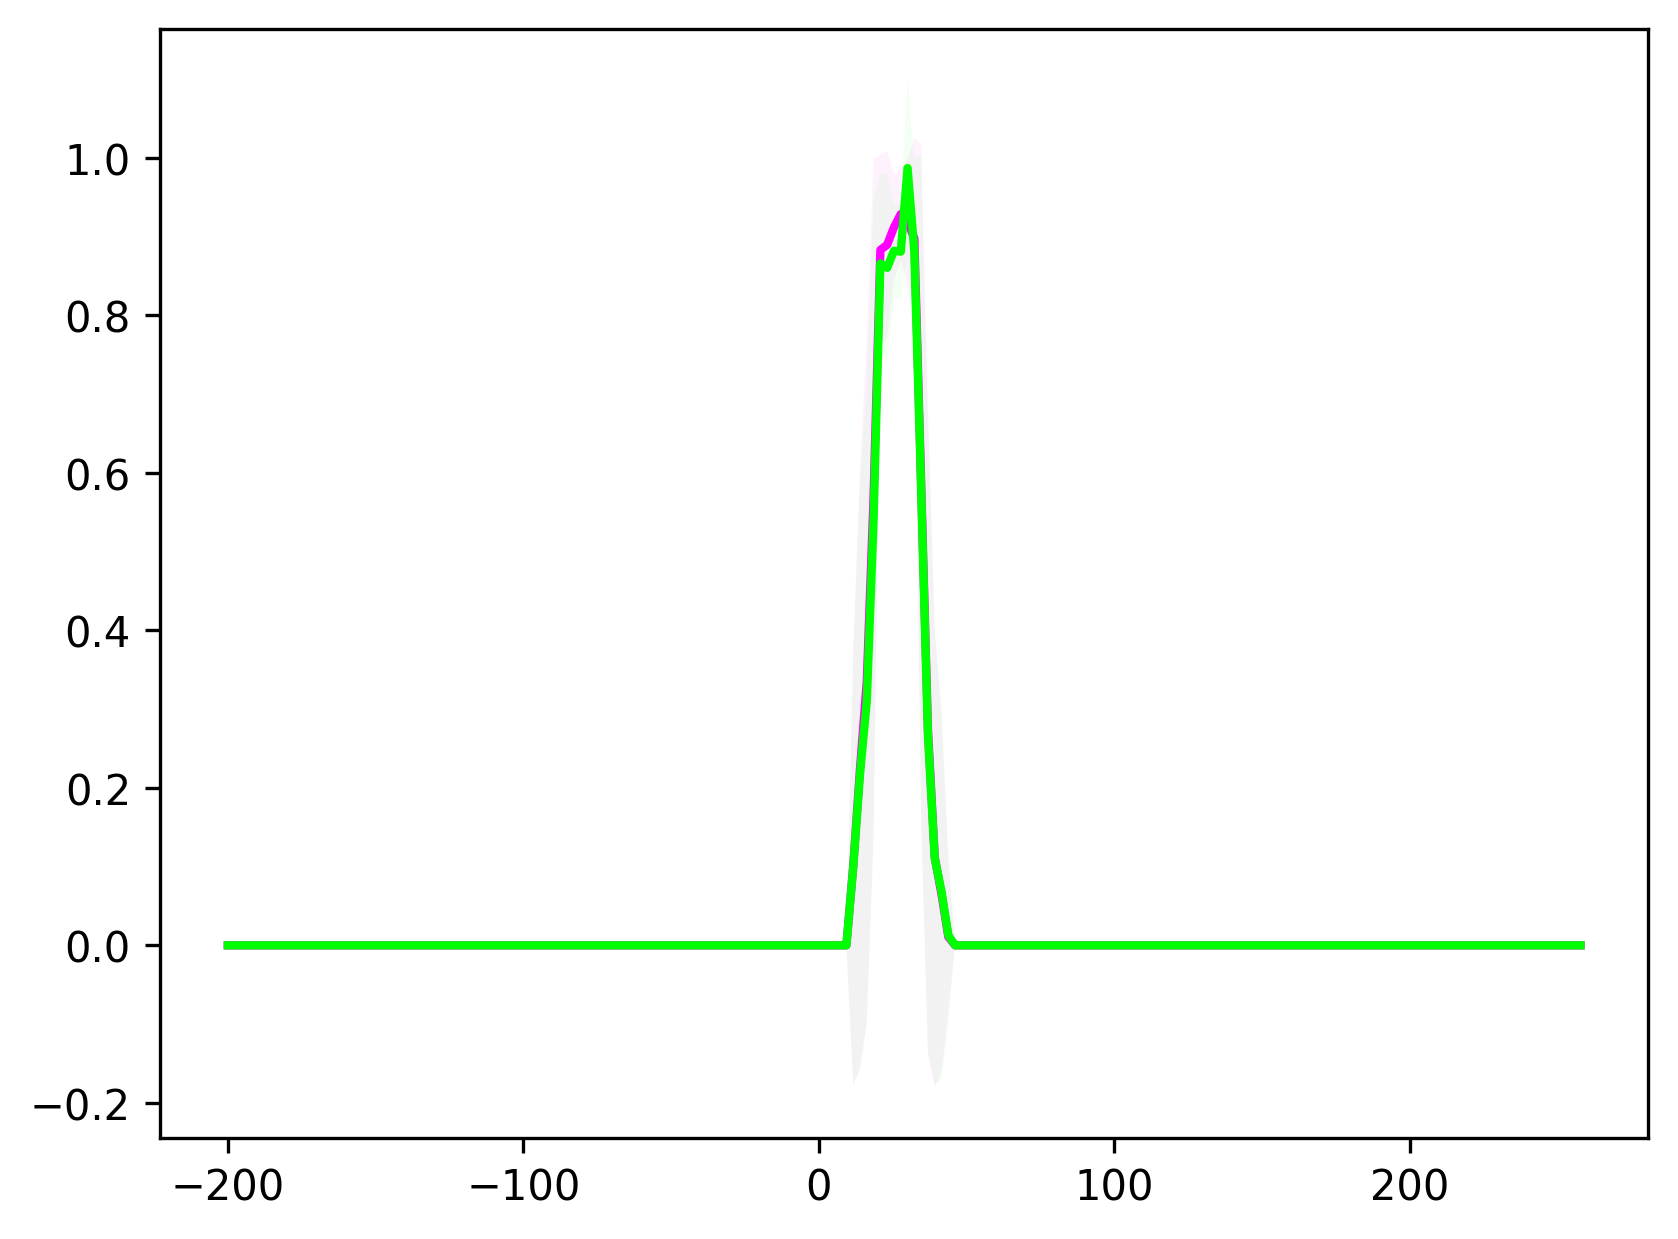

In [30]:
primary, secondary = createBufferForLifetimeCohort_normalized(track_id_arrays[0],0)
##Between 5 to 10 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) + 30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

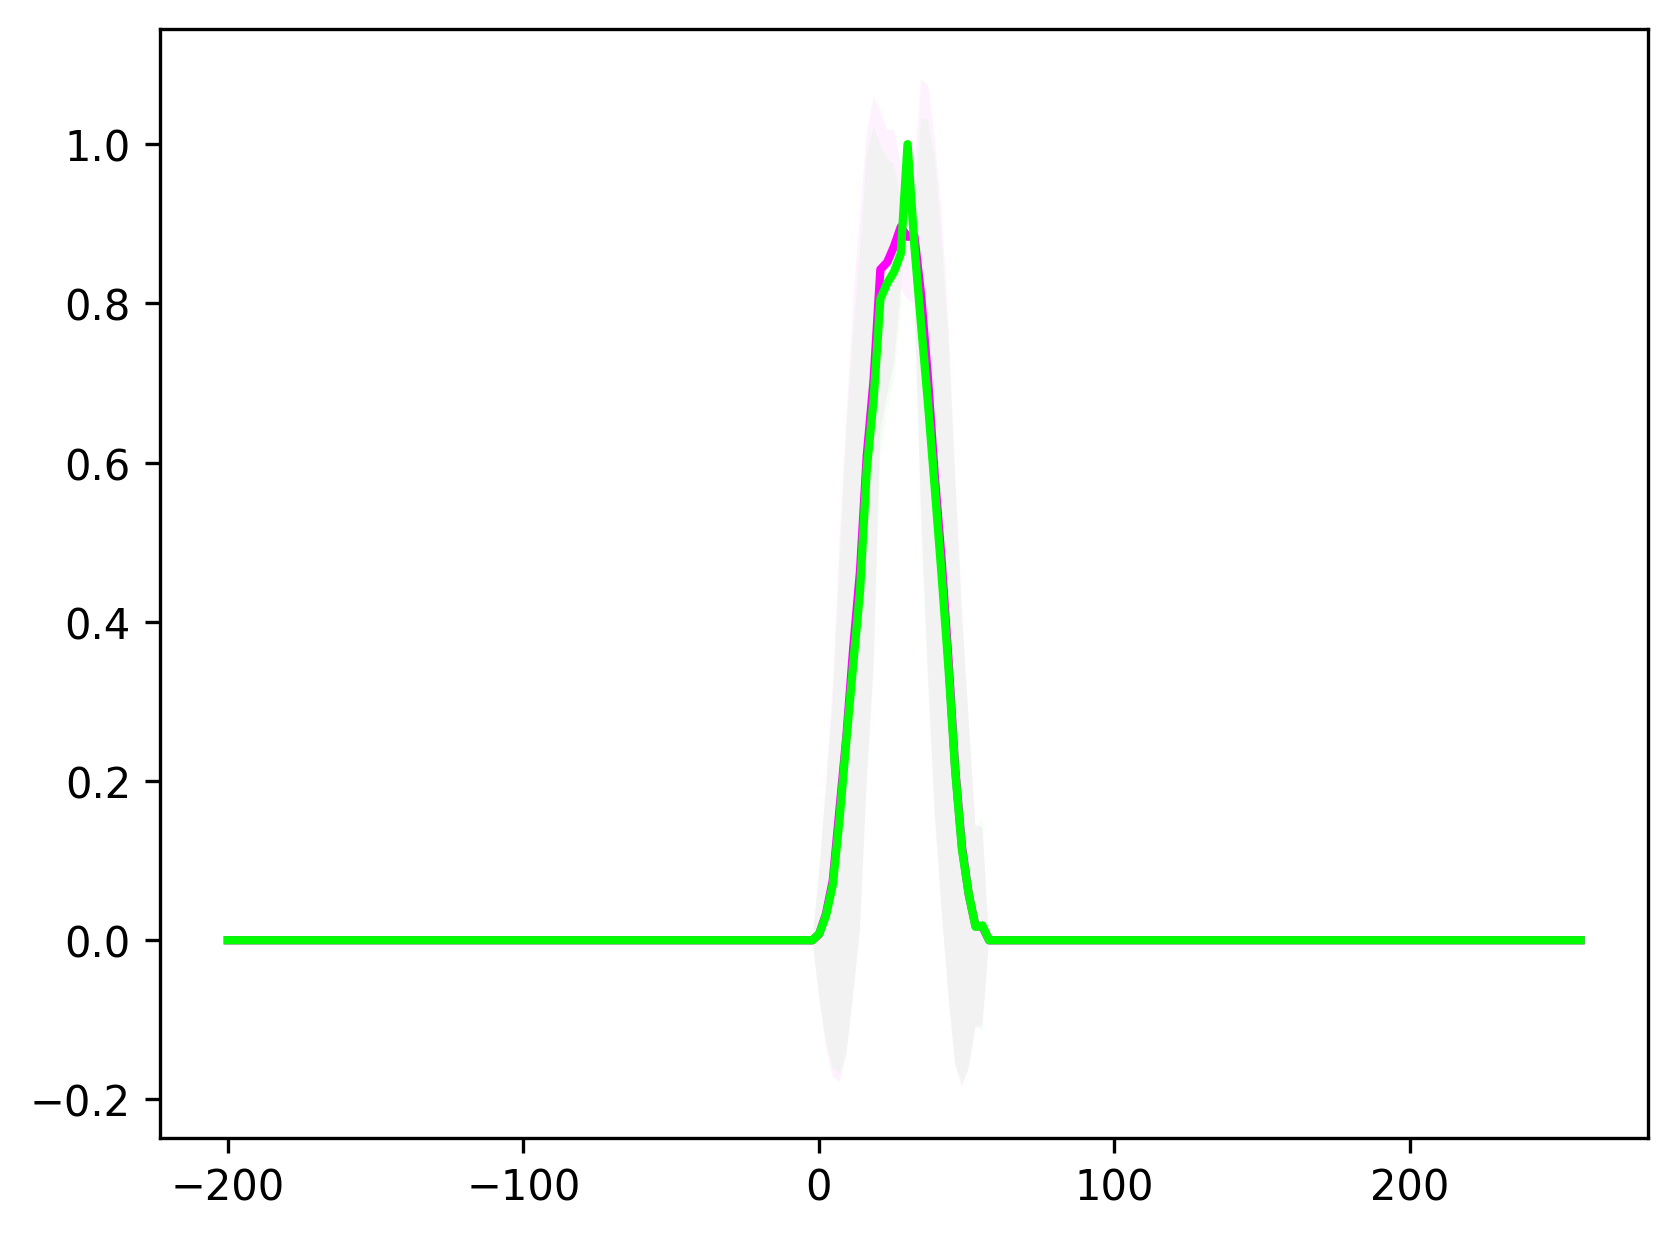

In [31]:
primary, secondary = createBufferForLifetimeCohort_normalized(track_id_arrays[1],0)
##Between 11 to 15 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) + 30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

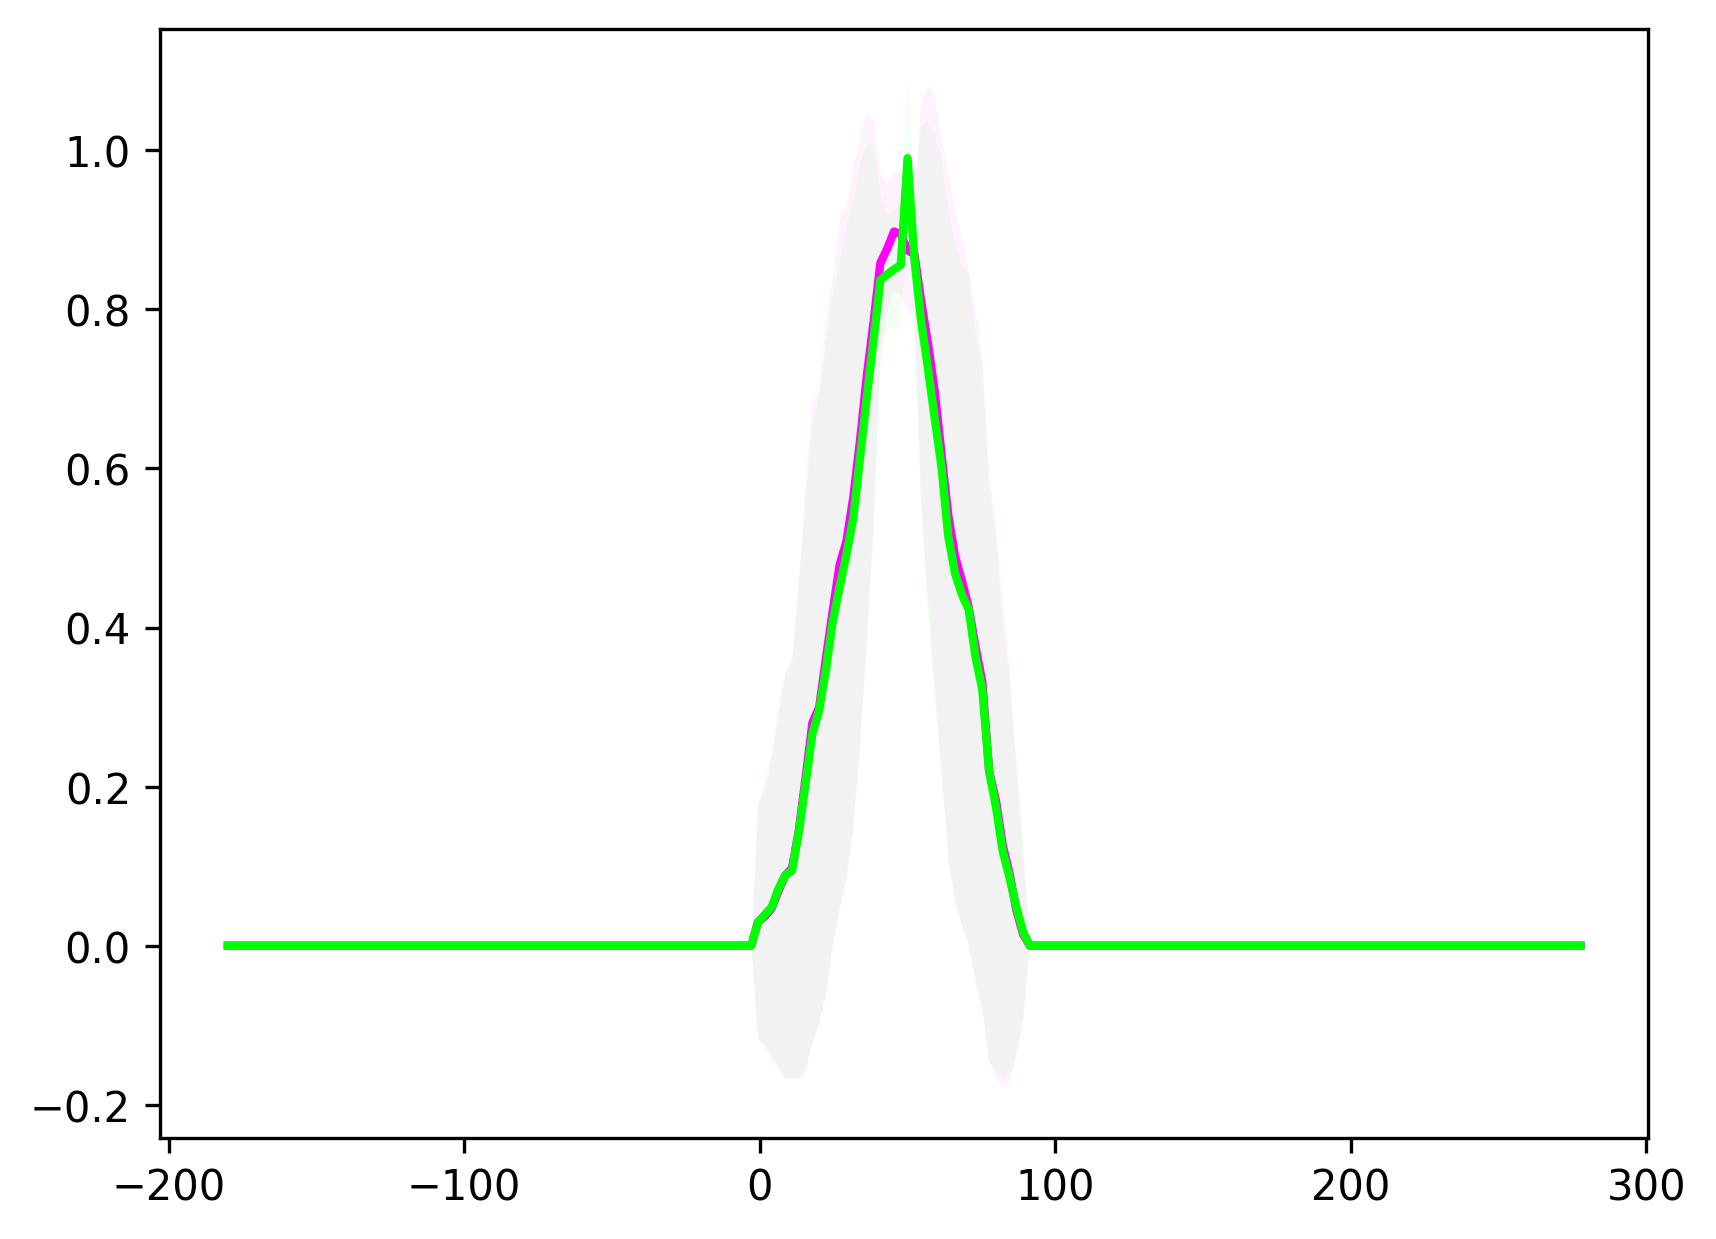

In [32]:
primary, secondary = createBufferForLifetimeCohort_normalized(track_id_arrays[2],0)
##Between 16 to 25 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) + 50
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

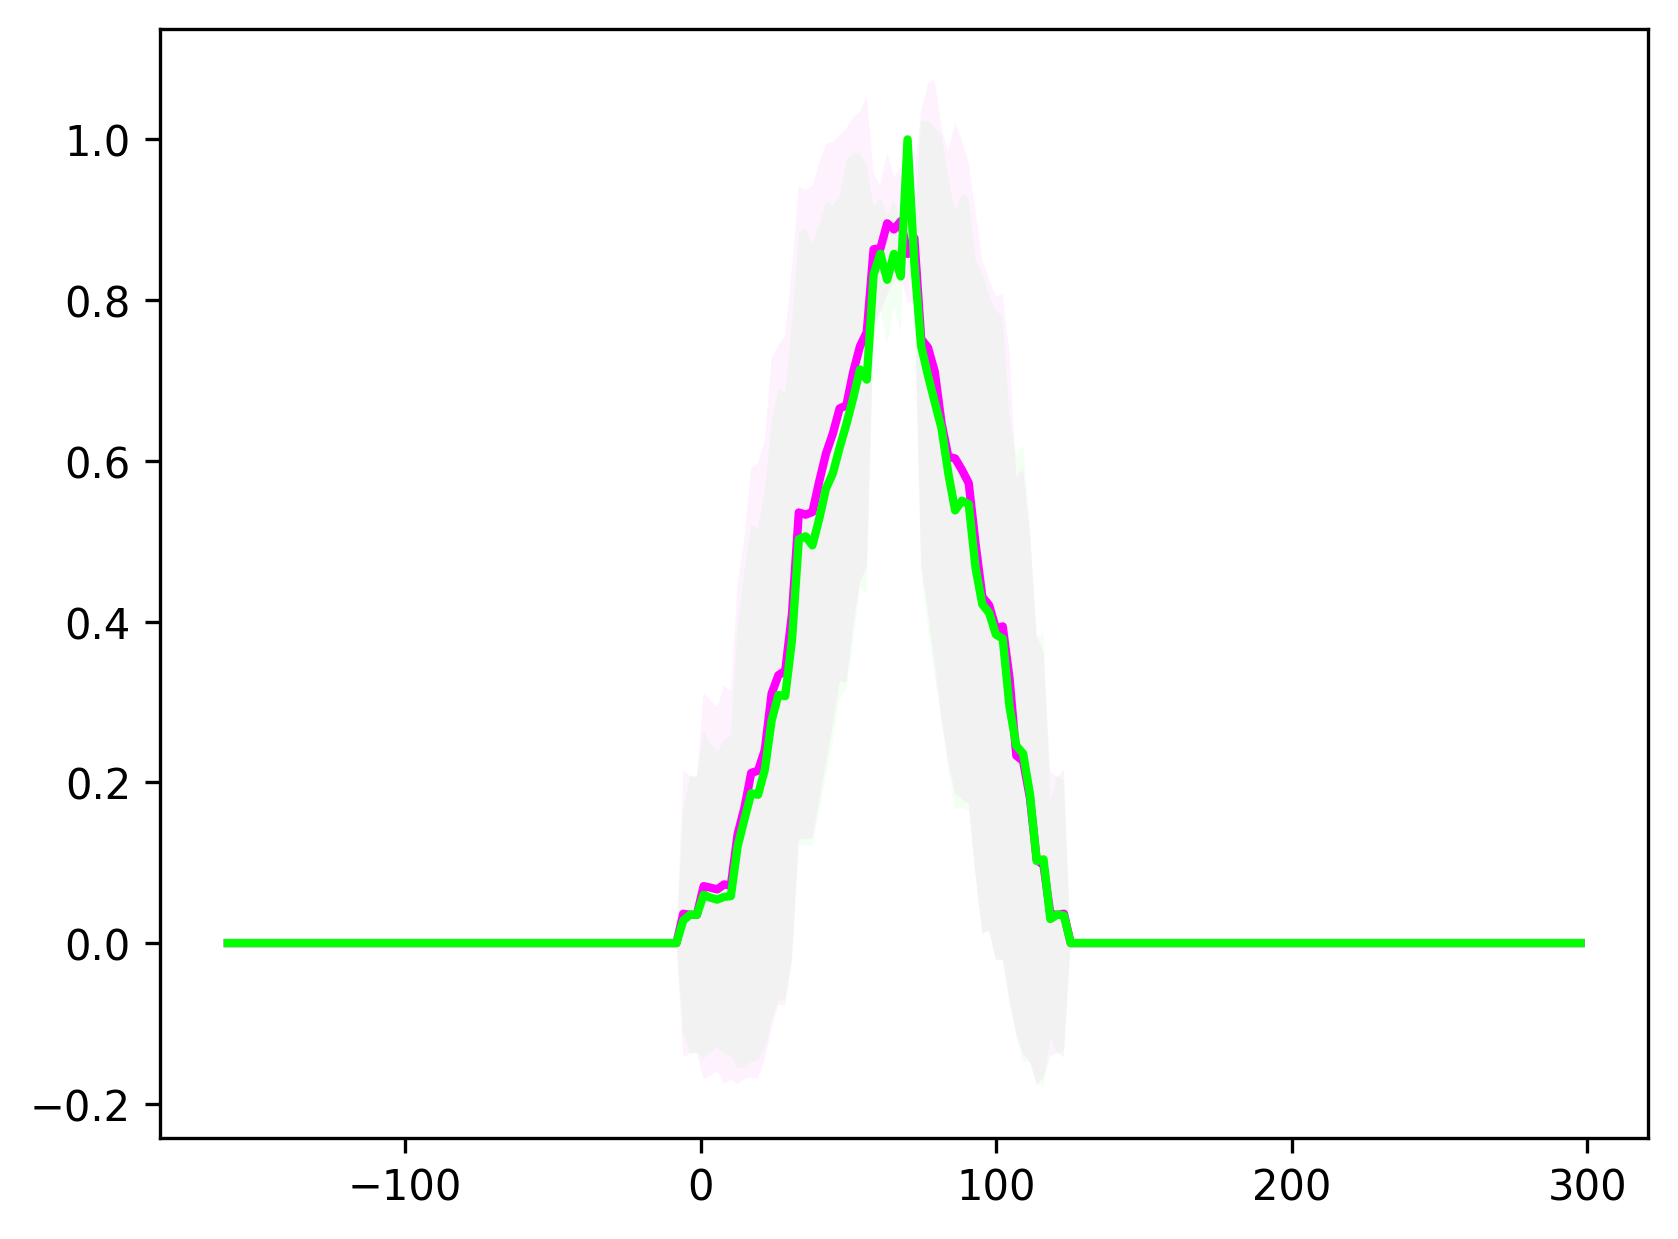

In [33]:
primary, secondary = createBufferForLifetimeCohort_normalized(track_id_arrays[3],0)
##Between 26 to 35 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) + 70
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

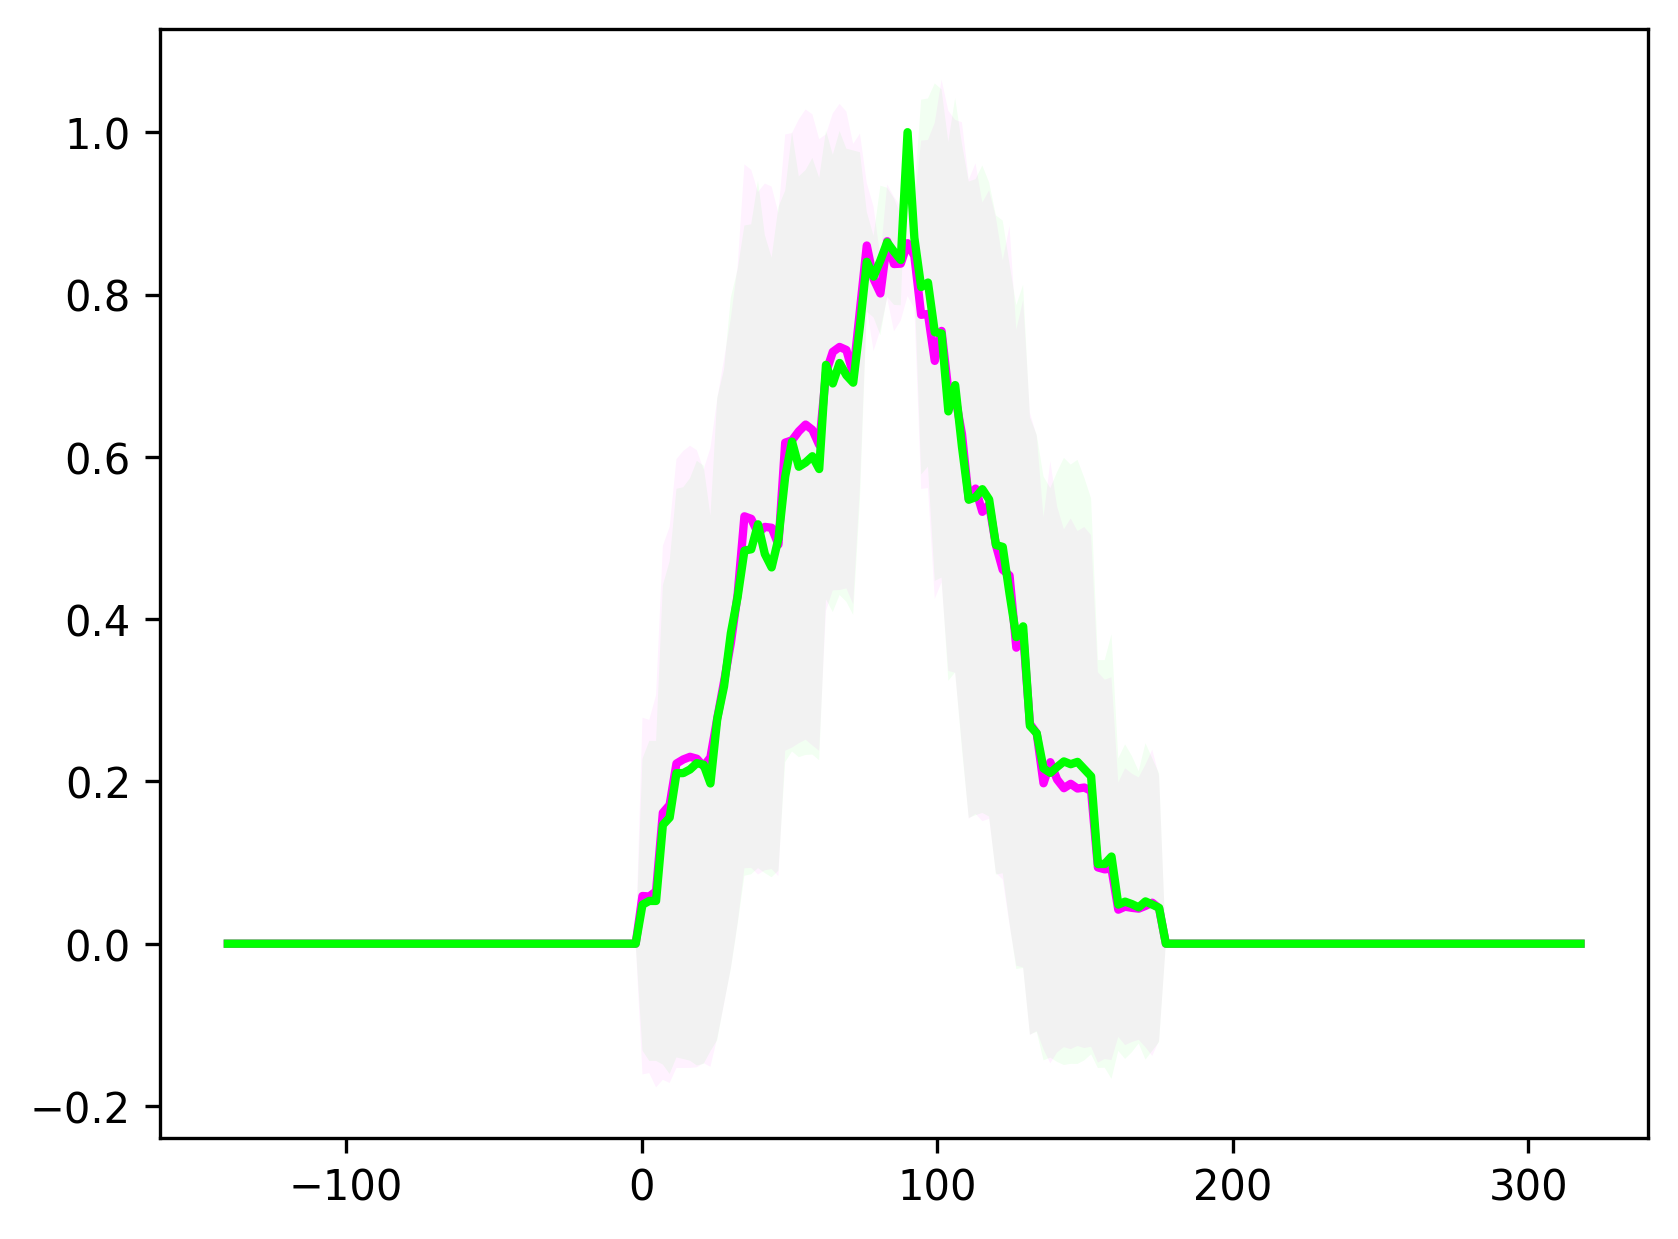

In [34]:
primary, secondary = createBufferForLifetimeCohort_normalized(track_id_arrays[4],0)
##Between 36 to 45 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) + 90
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

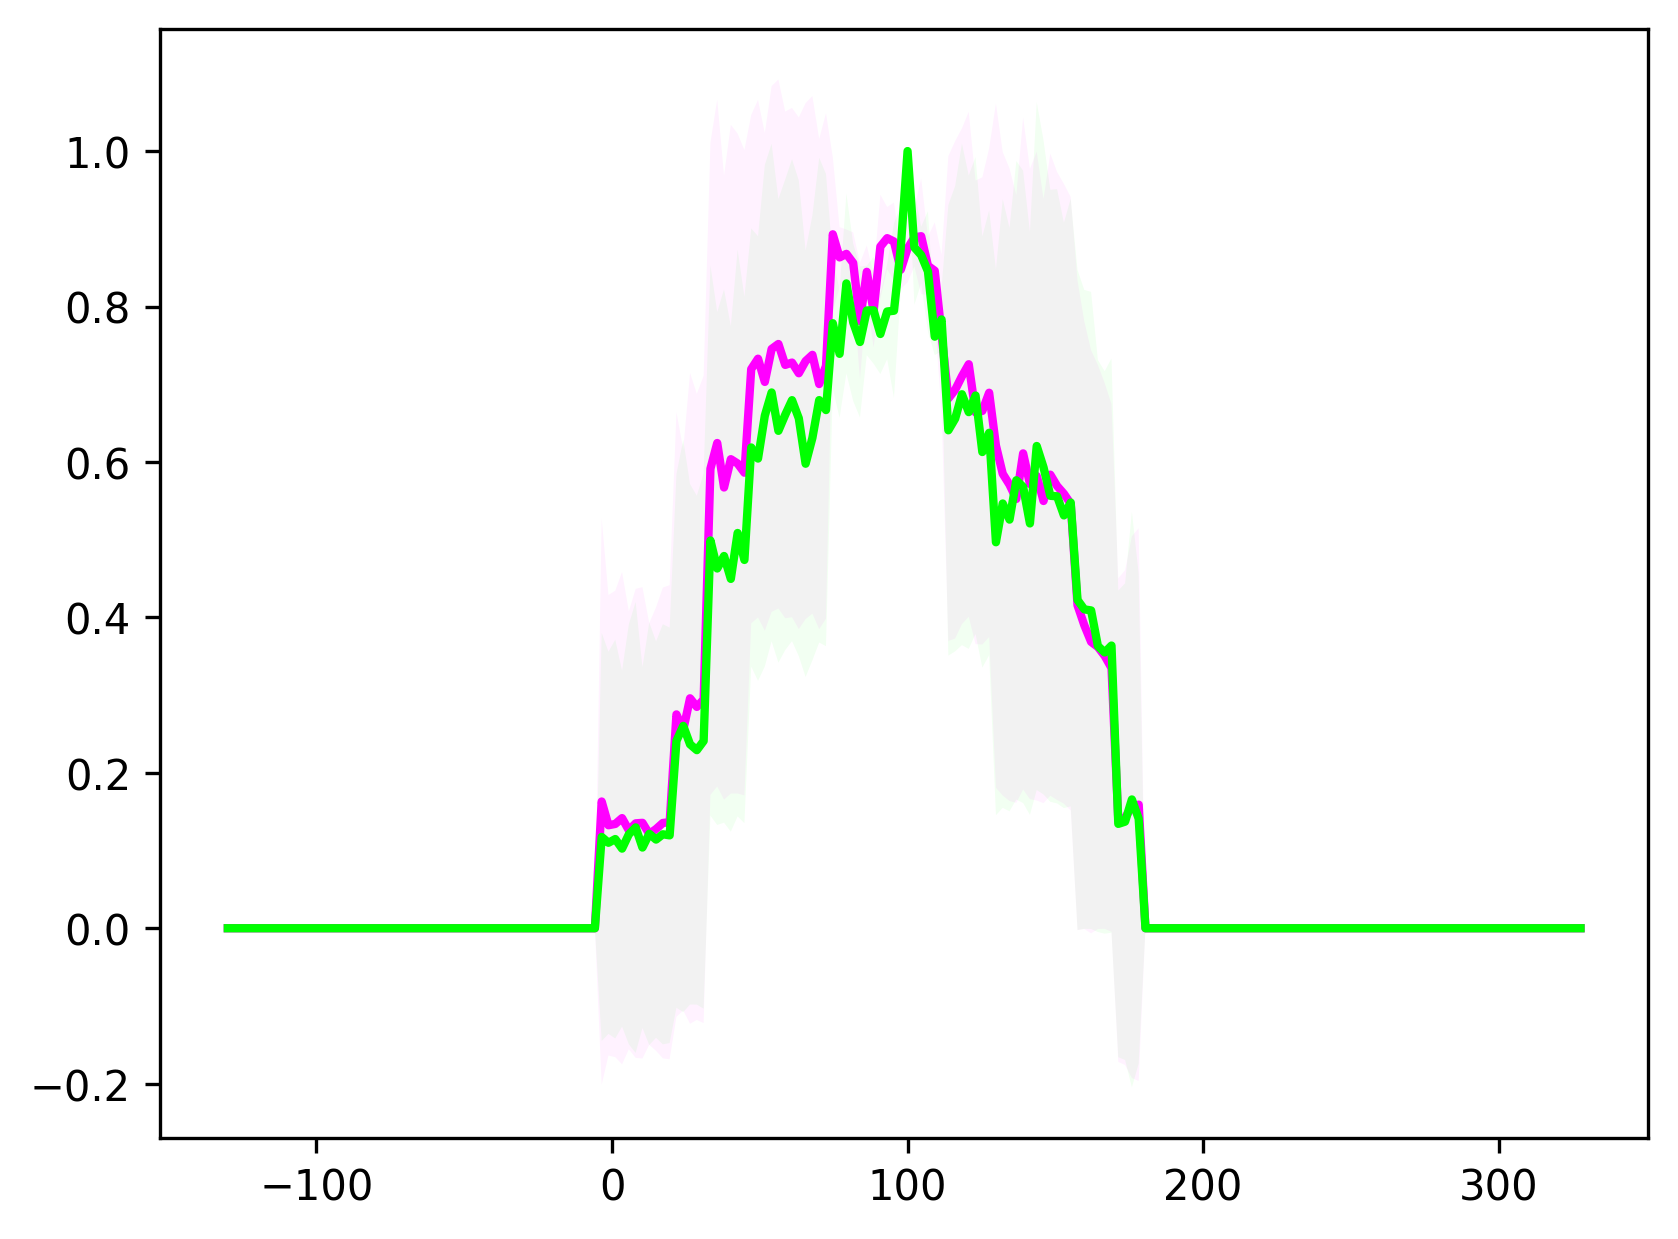

In [35]:
primary, secondary = createBufferForLifetimeCohort_normalized(track_id_arrays[5],0)
##Between 46 to 60 frames 

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
p_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100

timeShift = np.array([0,30,70,120]) + 100
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
p_buffer = primary 
s_buffer = secondary 

p_buffer_average = np.nanmean(p_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
p_buffer_std = np.nanstd(p_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,p_buffer_average,c=p_colors[cohortIdx],lw=liwi)
plt.fill_between(time,p_buffer_average-p_buffer_std,p_buffer_average+p_buffer_std,facecolor=p_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)